In [1]:
import mne
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
PATH = "/home/gromov_n/MASS/ss2/"

In [3]:
def ReadSignal(file_name): #move to utils

    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        if f.getNSamples()[i] == f.getNSamples()[0]:
            sigbufs[i, :] = f.readSignal(i)

    time = [1/f.samplefrequency(0) * i for i in range(len(sigbufs[0]))]

    return sigbufs, f, time

In [4]:
def ReadAnnotSignal(file_name): #move to utils

    f = pyedflib.EdfReader(file_name)

    annotations = f.readAnnotations()  
    f.close()
    return annotations

In [5]:
annotations = ReadAnnotSignal(PATH + "01-02-0001 Spindles_E1.edf")

In [6]:
annotations

(array([  888.569501,   905.999757,   917.97327 , ..., 28184.738132,
        28449.628879, 28623.066266]),
 array([0.640579, 0.578094, 0.847603, ..., 0.589806, 0.624962, 0.999939]),
 array(['<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>',
        '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>',
        '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>',
        ...,
        '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>',
        '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>',
        '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>'],
       dtype='<U87'))

In [8]:
sigbufs, f, time = ReadSignal(PATH + "01-02-0001 PSG.edf")

In [10]:
def Labeling(time, events):
    labels = np.zeros_like(time)
    for i in range(len(events[0])):
        start = np.array(time < events[0][i]).argmin() - 1
        fin = np.array(time < events[0][i] + events[1][i]).argmin() - 1
        labels[start:fin] =  1
    return labels

In [11]:
labels = Labeling(time, annotations)

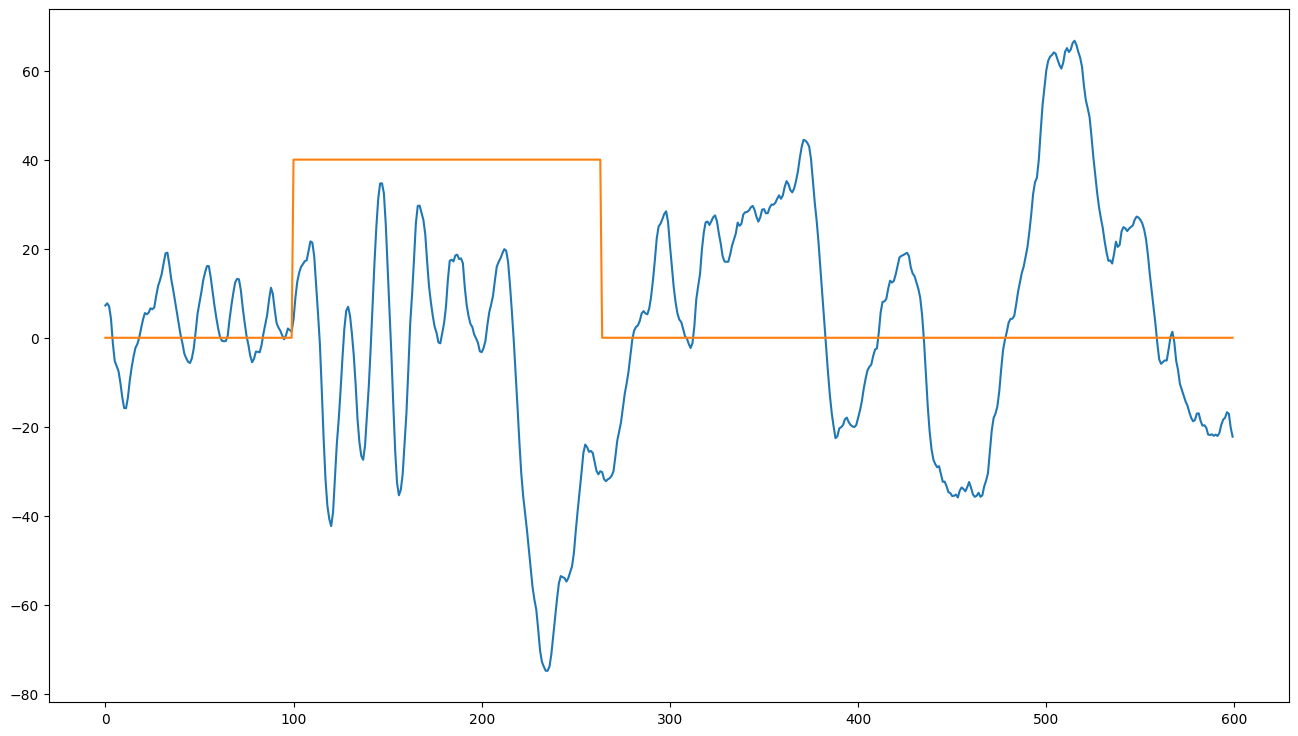

In [14]:
ind = labels.argmax()
plt.figure(figsize=(16, 9))
plt.plot(sigbufs[3, ind - 100: ind + 500])
plt.plot(labels[ind - 100: ind + 500] * 40)


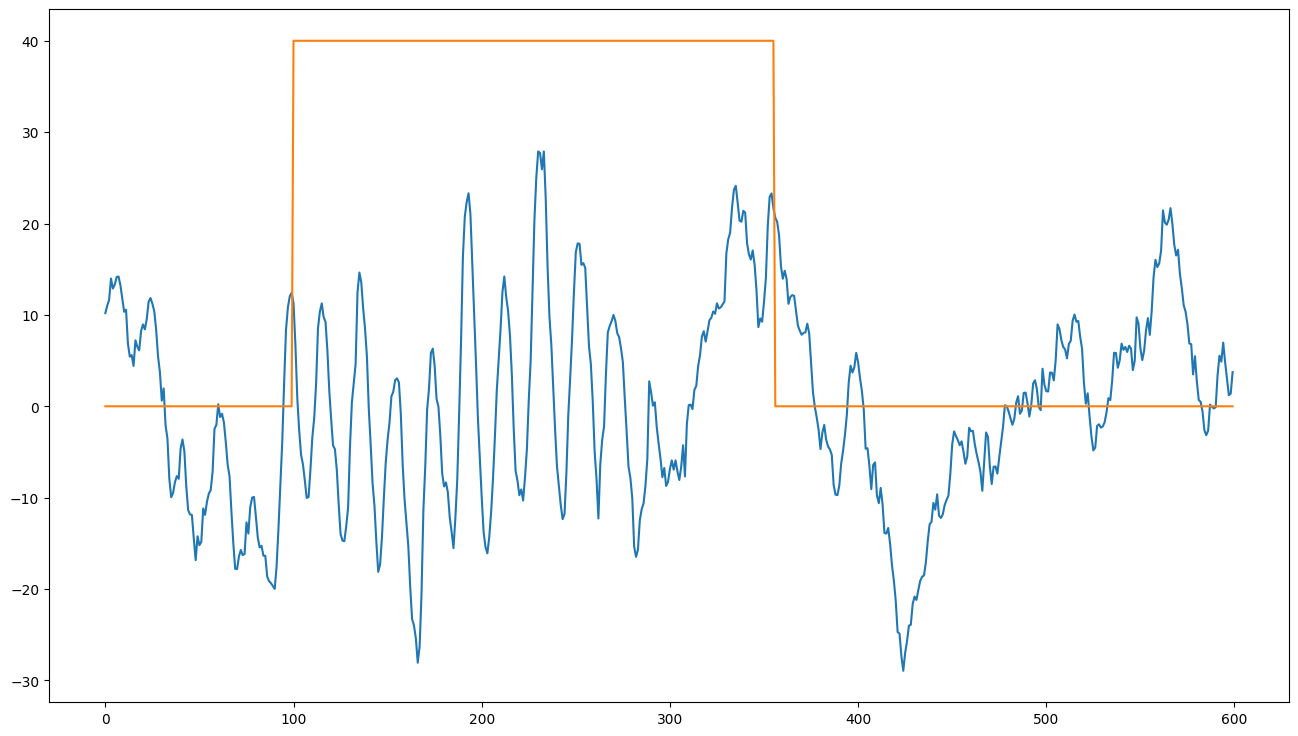

In [15]:
ind = labels[-100000:].argmax() + 7412736-100000
plt.figure(figsize=(16, 9))
plt.plot(sigbufs[3, ind - 100: ind + 500])
plt.plot(labels[ind - 100: ind + 500] * 40)


In [77]:
def Plotting(labels, data):
    raw_data = data.get_data()
    fig = plt.figure(figsize=(16, 9))
    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    
    ind = labels.argmax()
    ax_1.plot(raw_data[3, ind - 100: ind + 500])
    ax_1.plot(labels[ind - 100: ind + 500] * 3e-5)

    ind = labels[-100000:].argmax() + len(raw_data[3])-100000
    ax_2.plot(raw_data[3, ind - 100: ind + 500])
    ax_2.plot(labels[ind - 100: ind + 500] * 3e-5)
    plt.show()
    

In [78]:
def Labeling(time, events):
    SHIFT = 57
    labels = np.zeros_like(time)
    for event in events:
        start = np.array(time < event["onset"]).argmin() - 1
        fin = np.array(time < event["onset"] + event["duration"]).argmin() - 1
        labels[start - SHIFT:fin - SHIFT] =  1
    return labels

In [79]:
def LabelingAllData():
    data_filenames = []
    for file in os.listdir(PATH):
        if "PSG" in file:
            data_filenames.append(file)
    for file in data_filenames:
        annot_filenameE1 = file[:10] + " Spindles_E1.edf"
        annot_filenameE2 = file[:10] + " Spindles_E2.edf"

        data = mne.io.read_raw_edf(PATH + file)

        labels1 = 1
        labels2 = 1
        
        if annot_filenameE1 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE1)
            labels1 = Labeling(data.times, annot_data.annotations)
            Plotting(labels1, data)
            annot_data.close()
        
        if annot_filenameE2 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE2)
            labels2 = Labeling(data.times, annot_data.annotations)
            Plotting(labels2, data)
            annot_data.close()

        labels = labels1 * labels2
        np.save("data/" + file + "labels", labels)
        data.close()
            
        

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


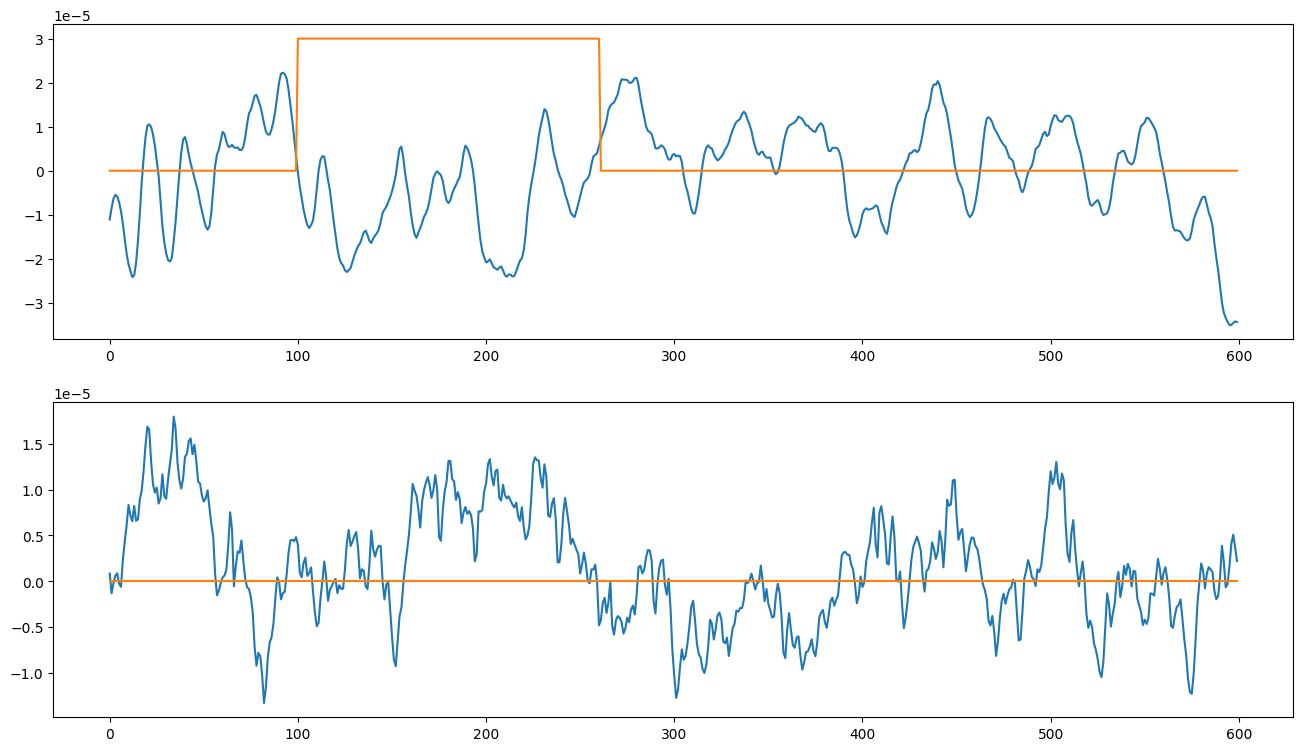

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


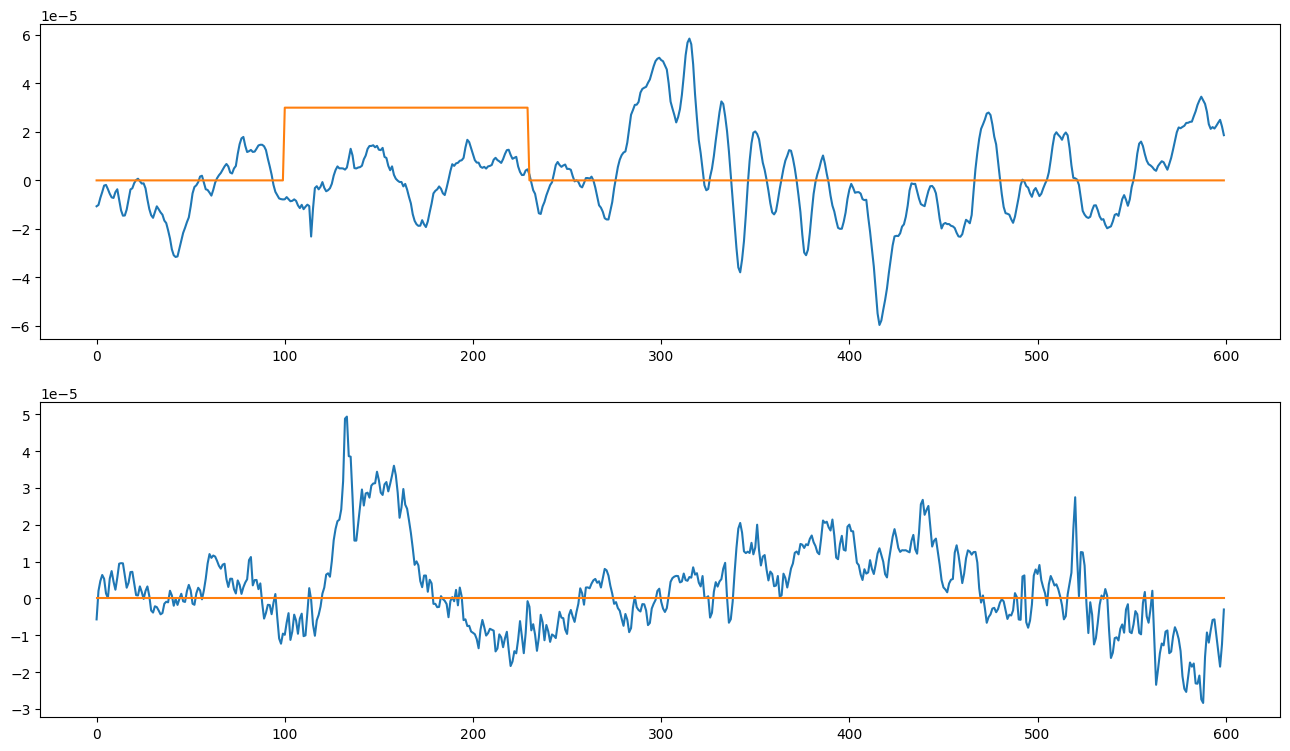

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


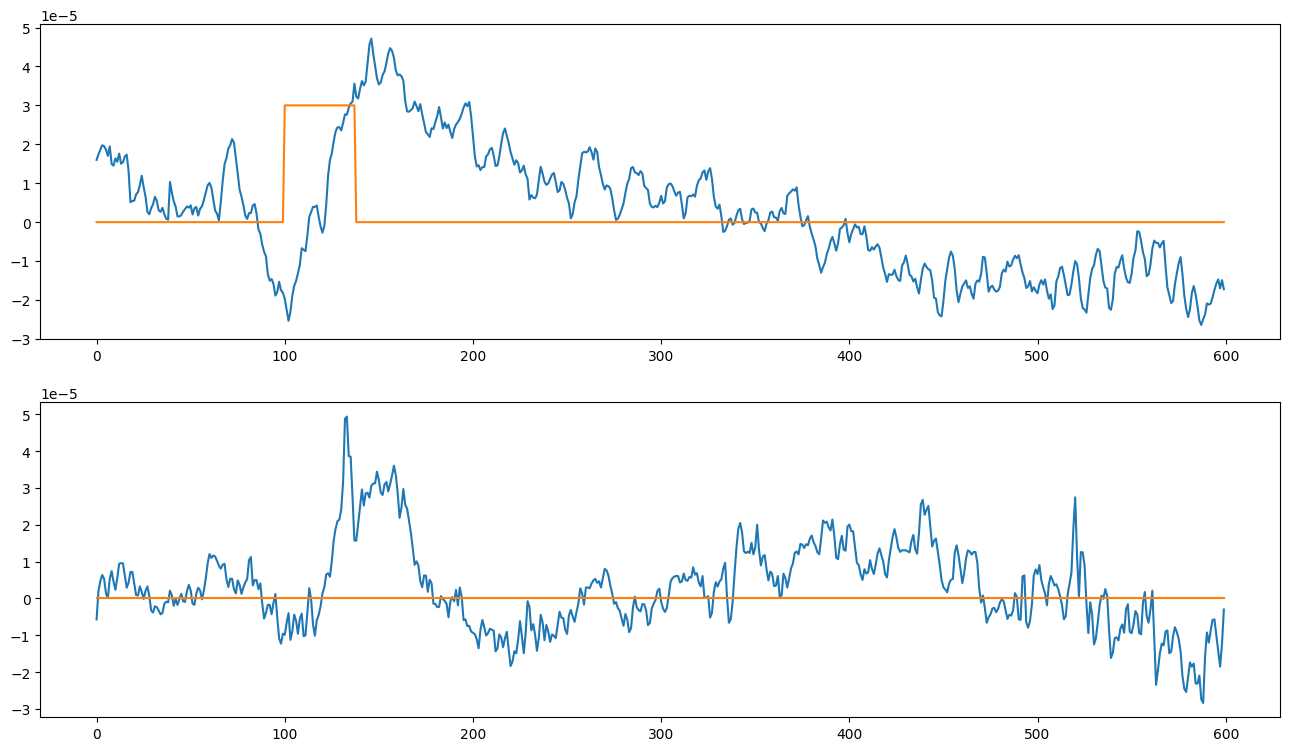

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


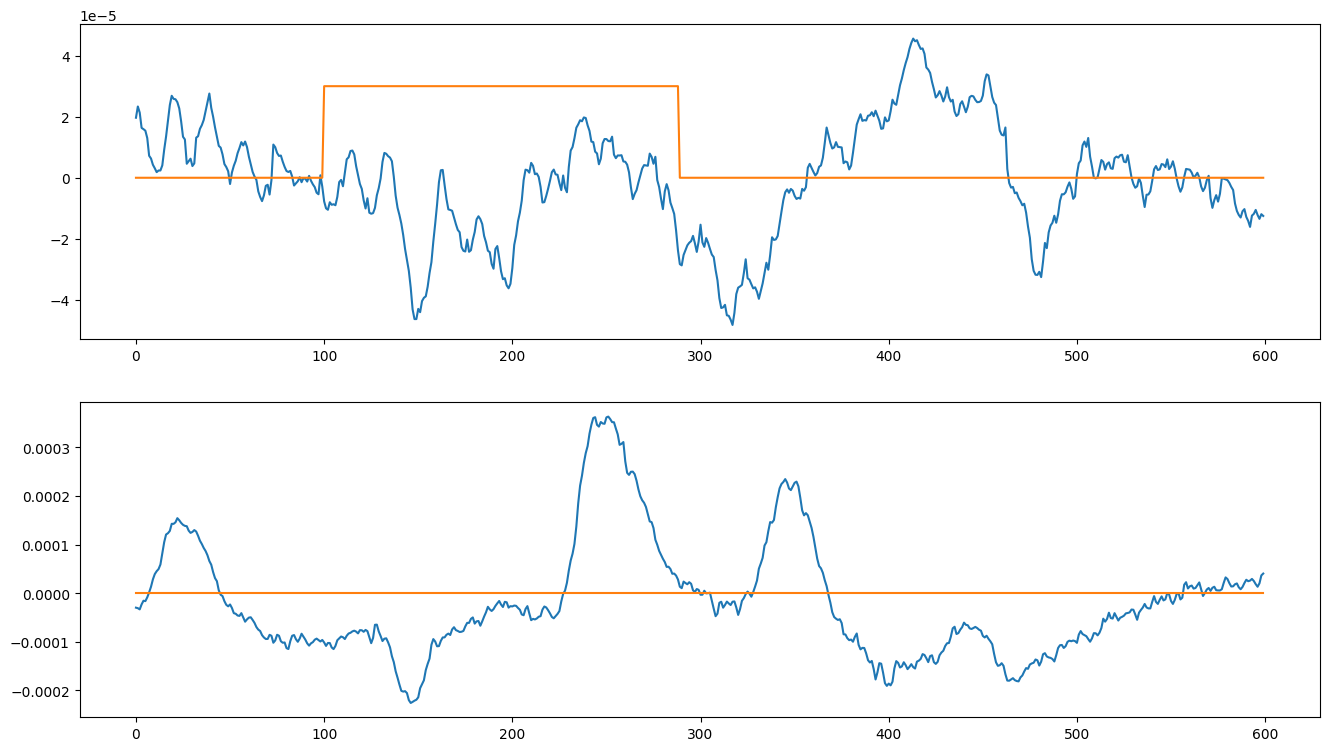

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


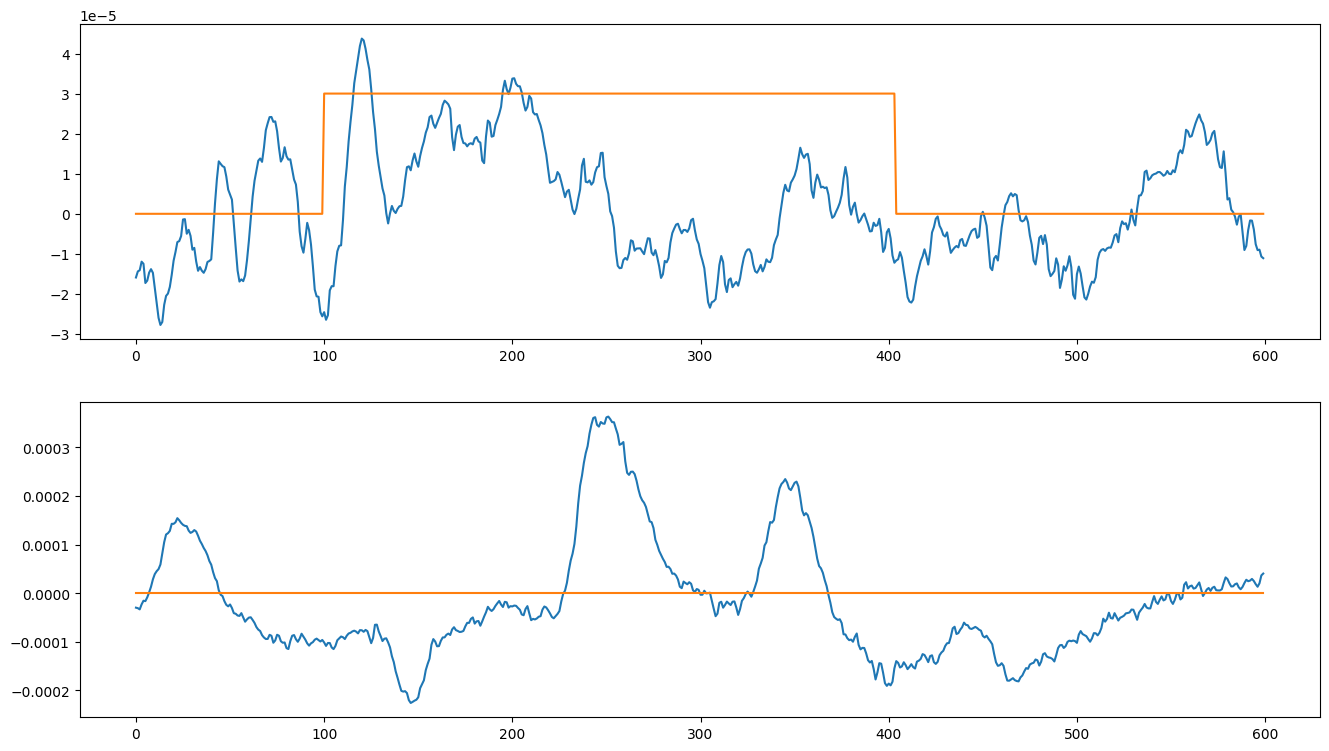

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


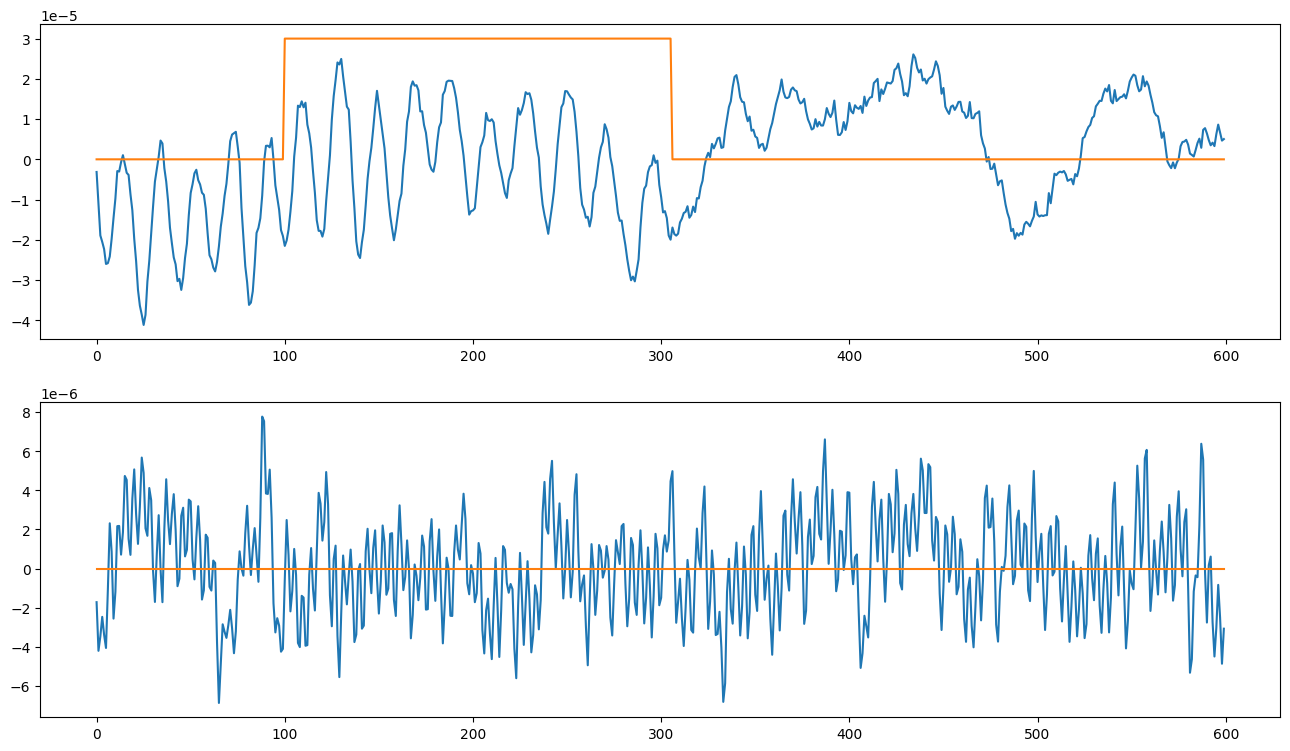

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


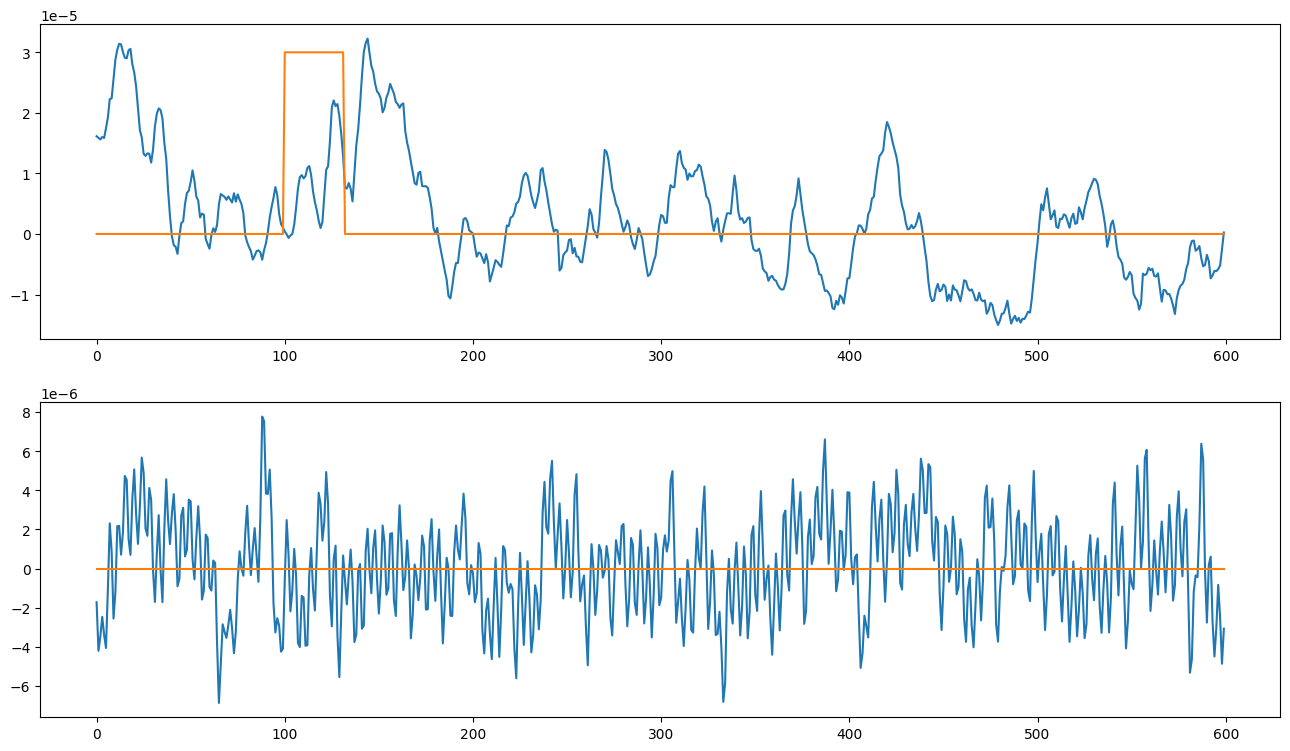

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


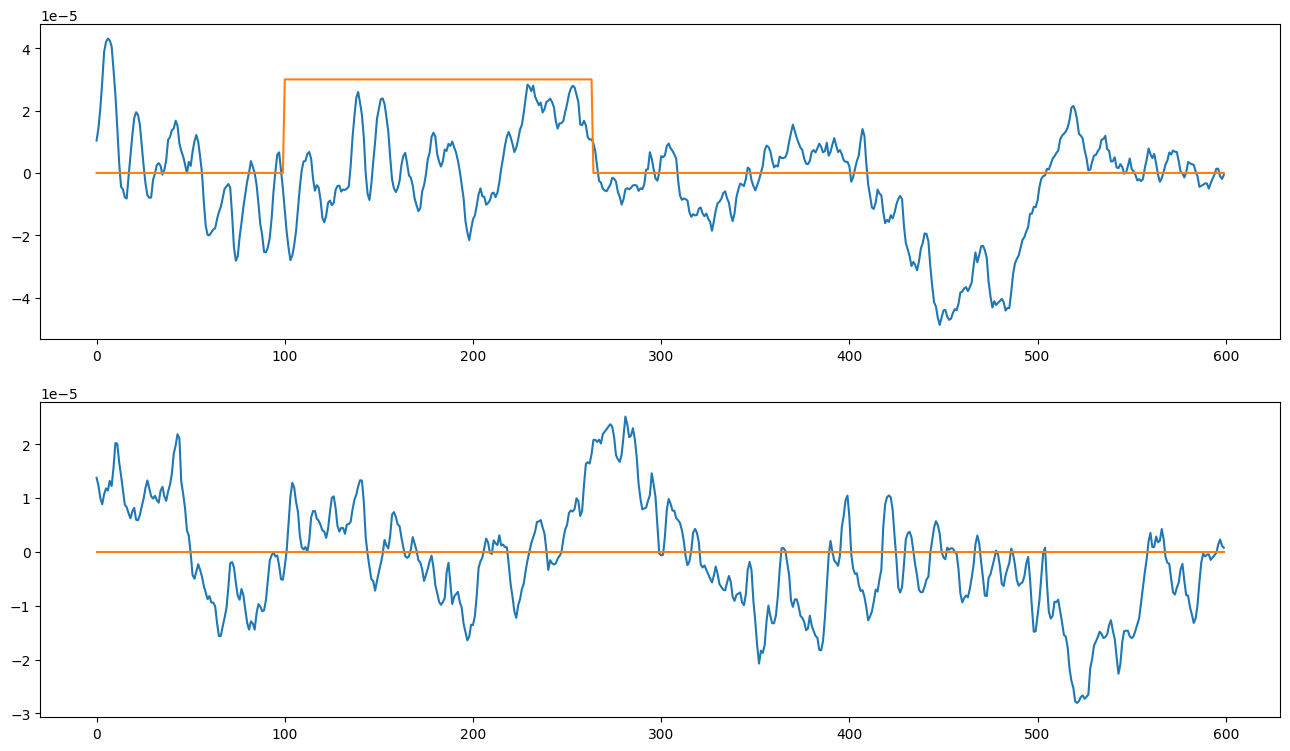

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


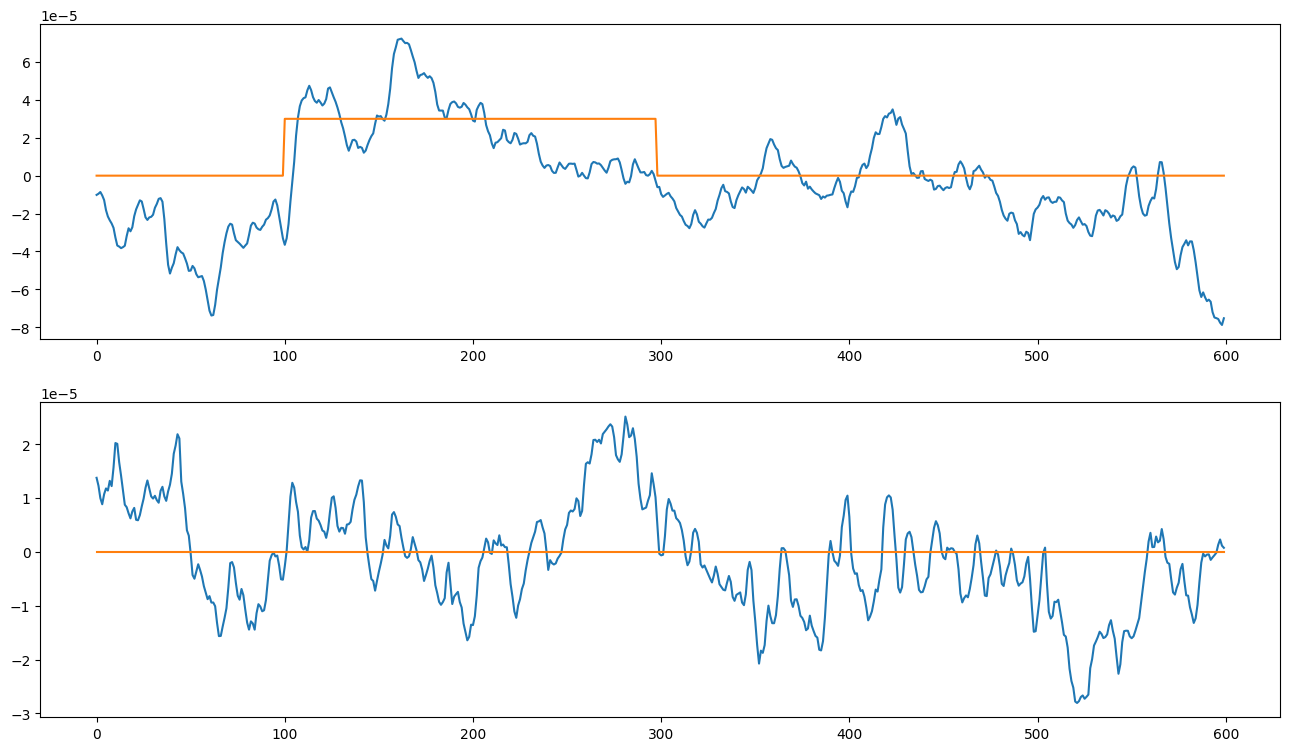

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


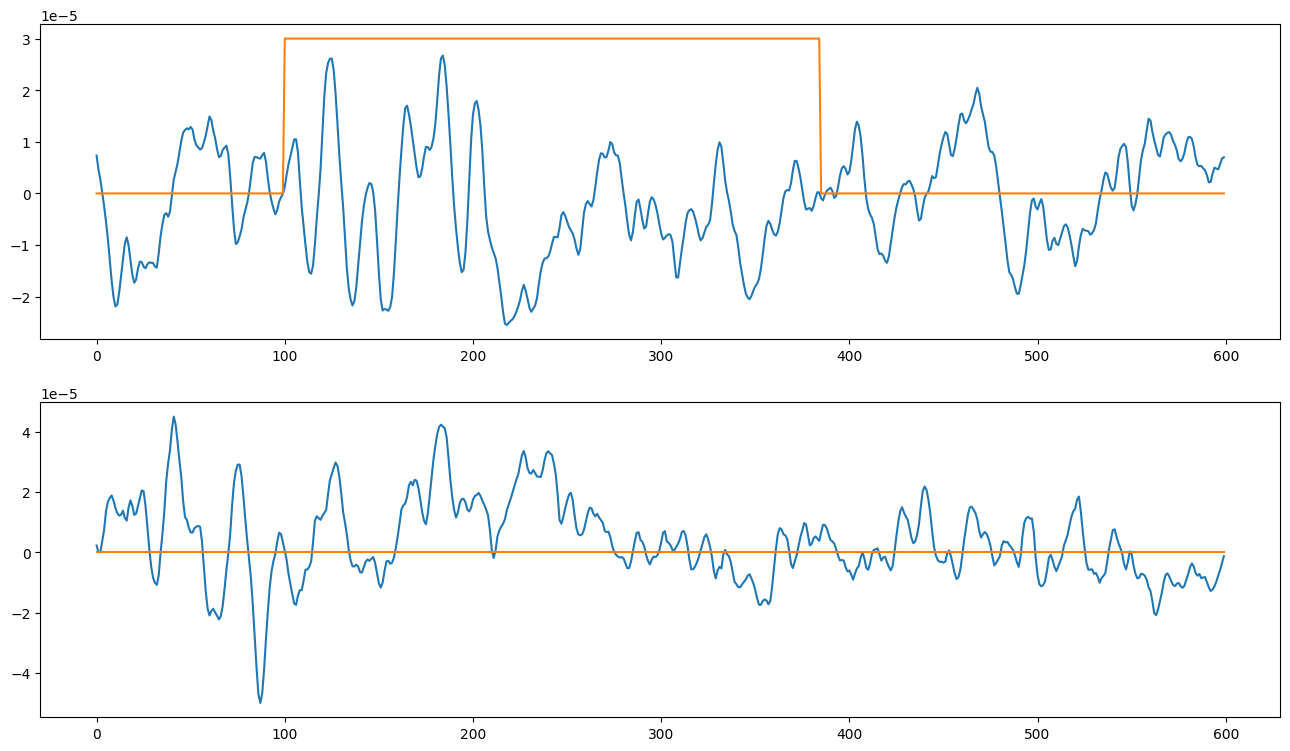

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


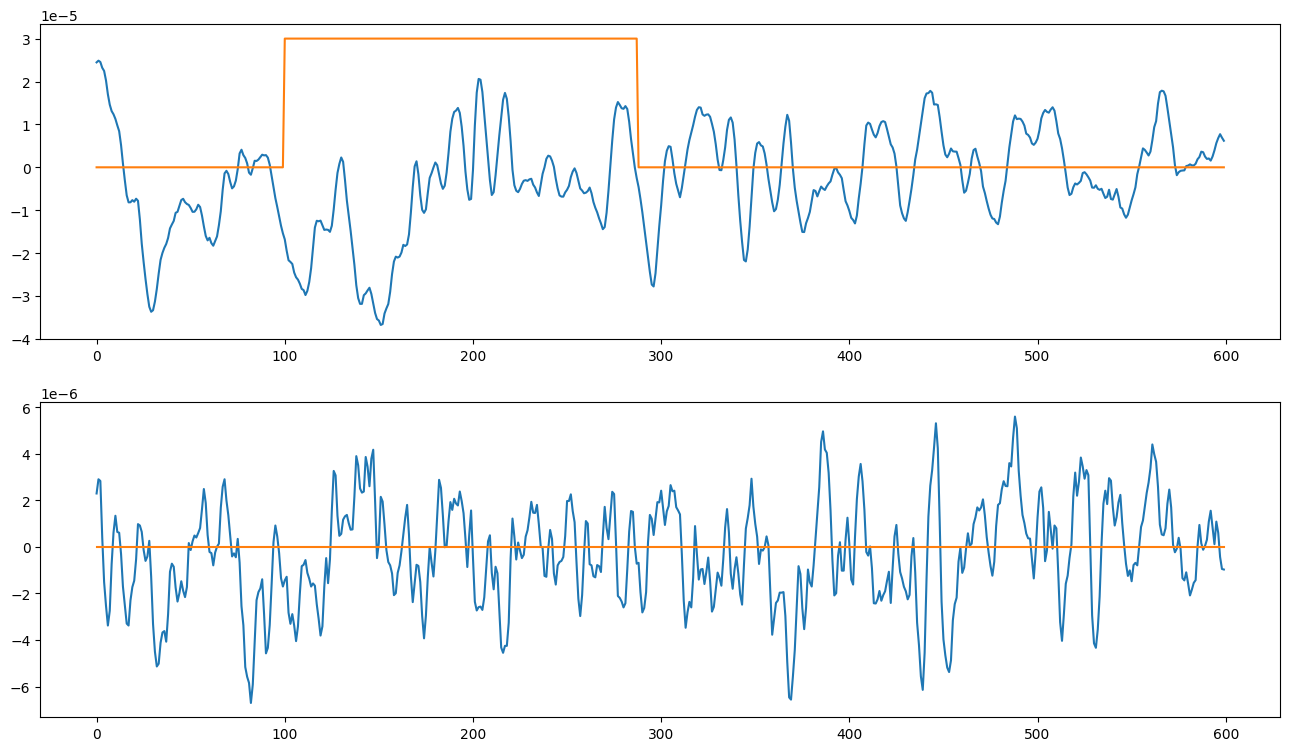

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


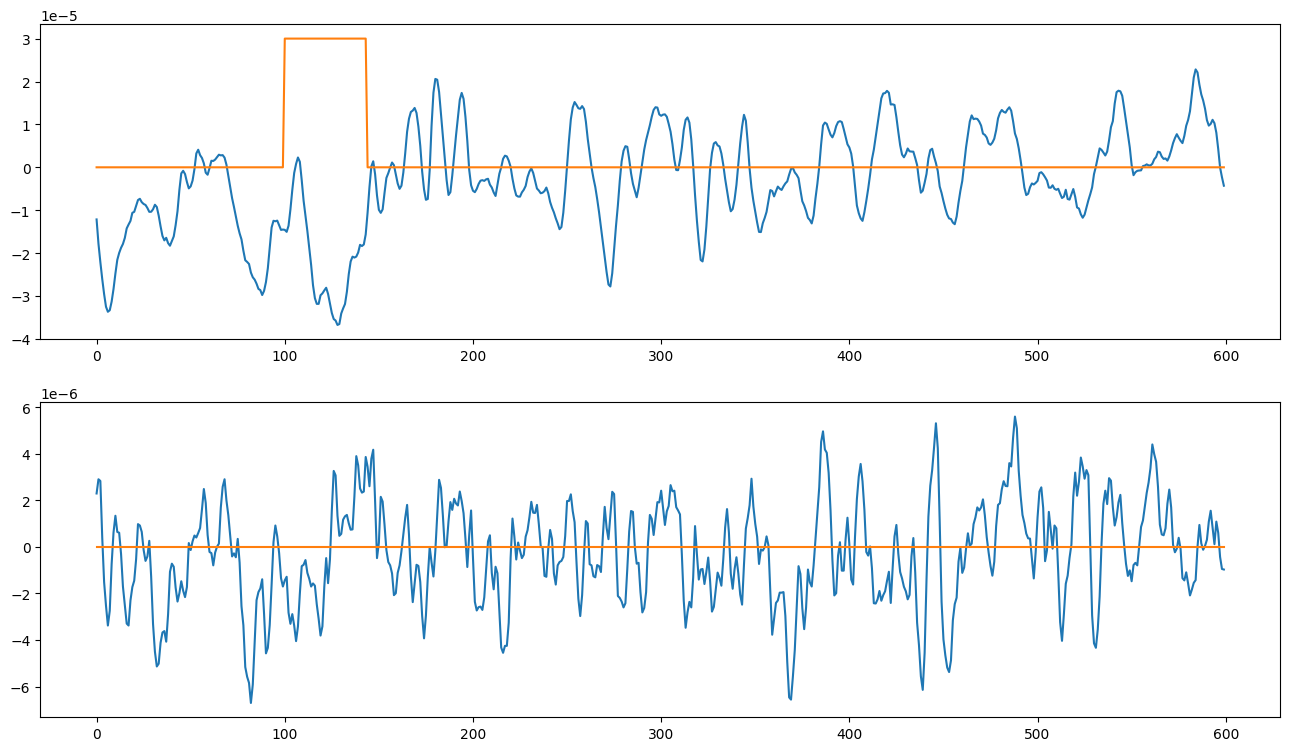

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


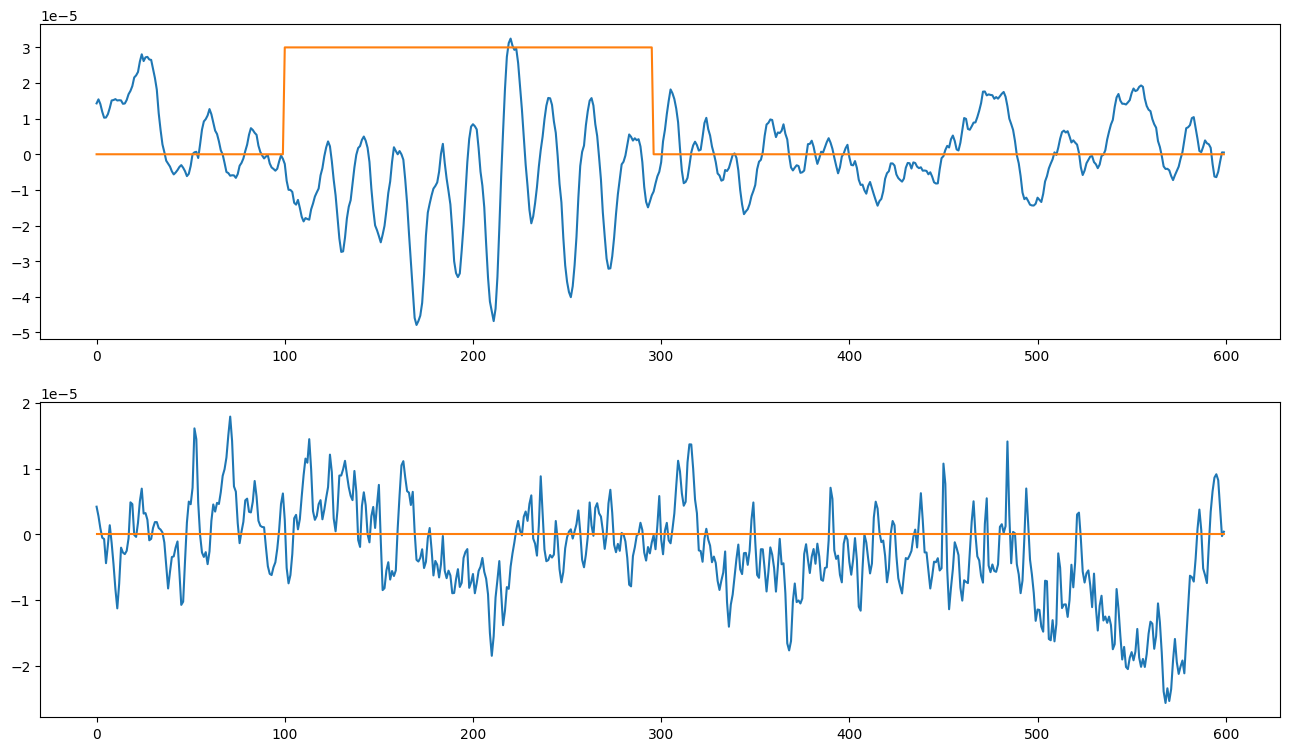

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


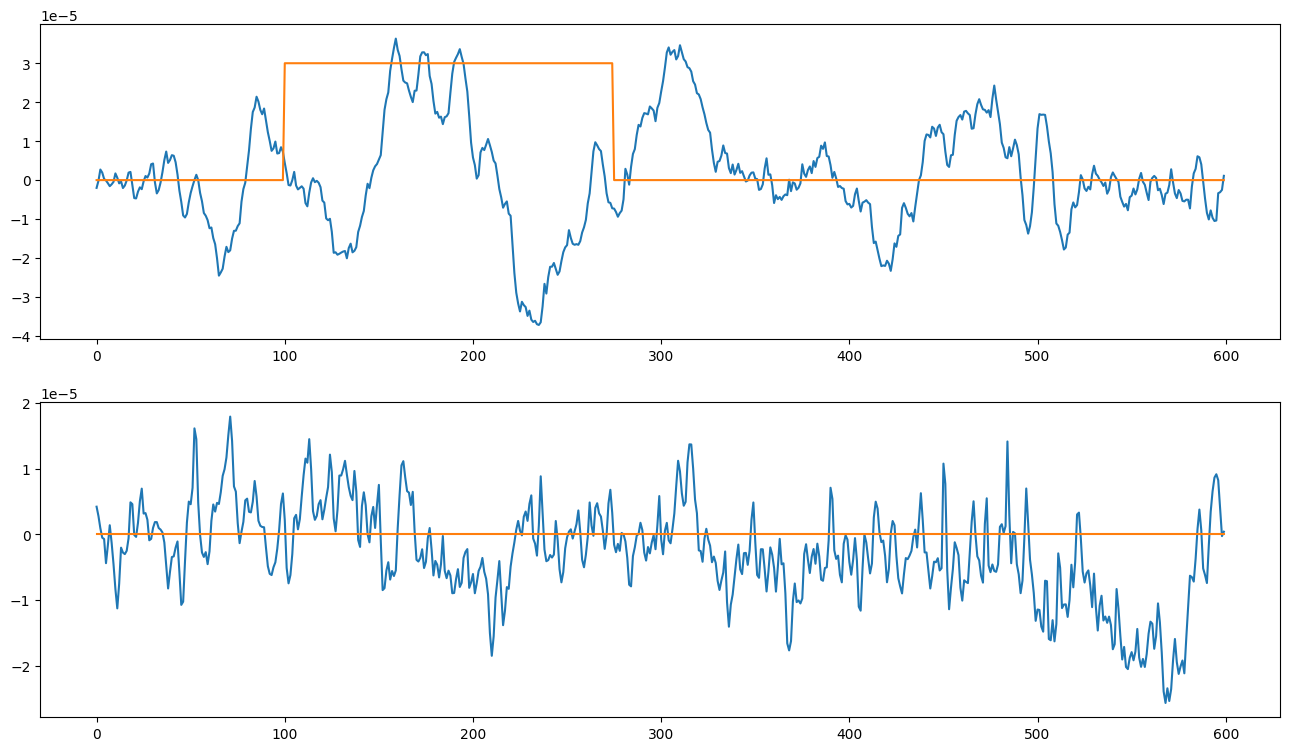

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


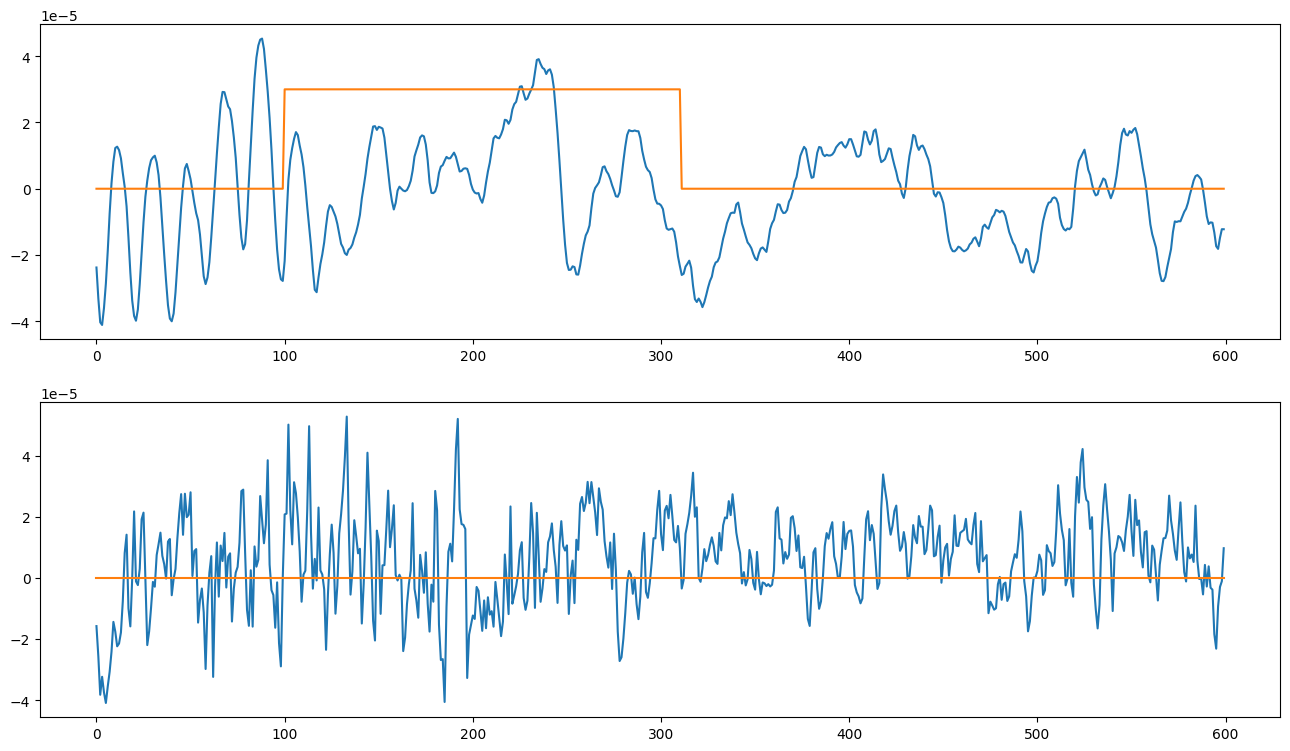

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


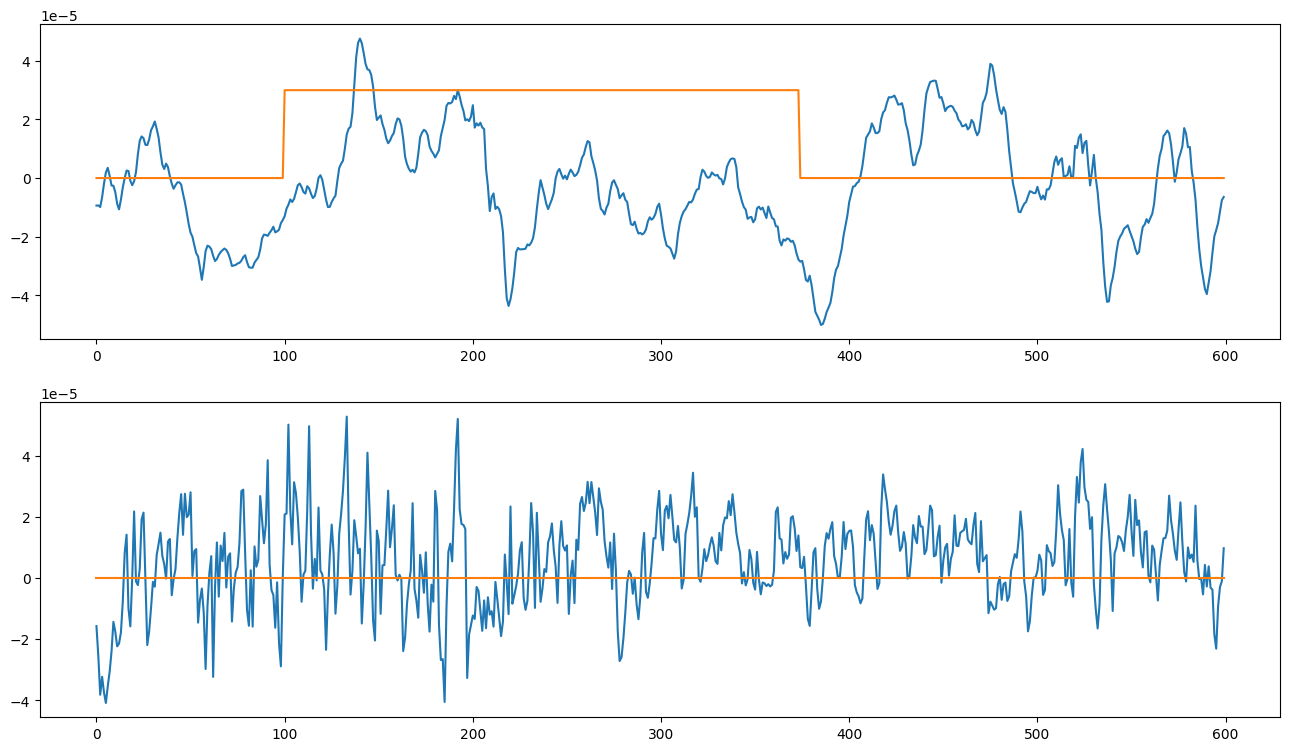

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


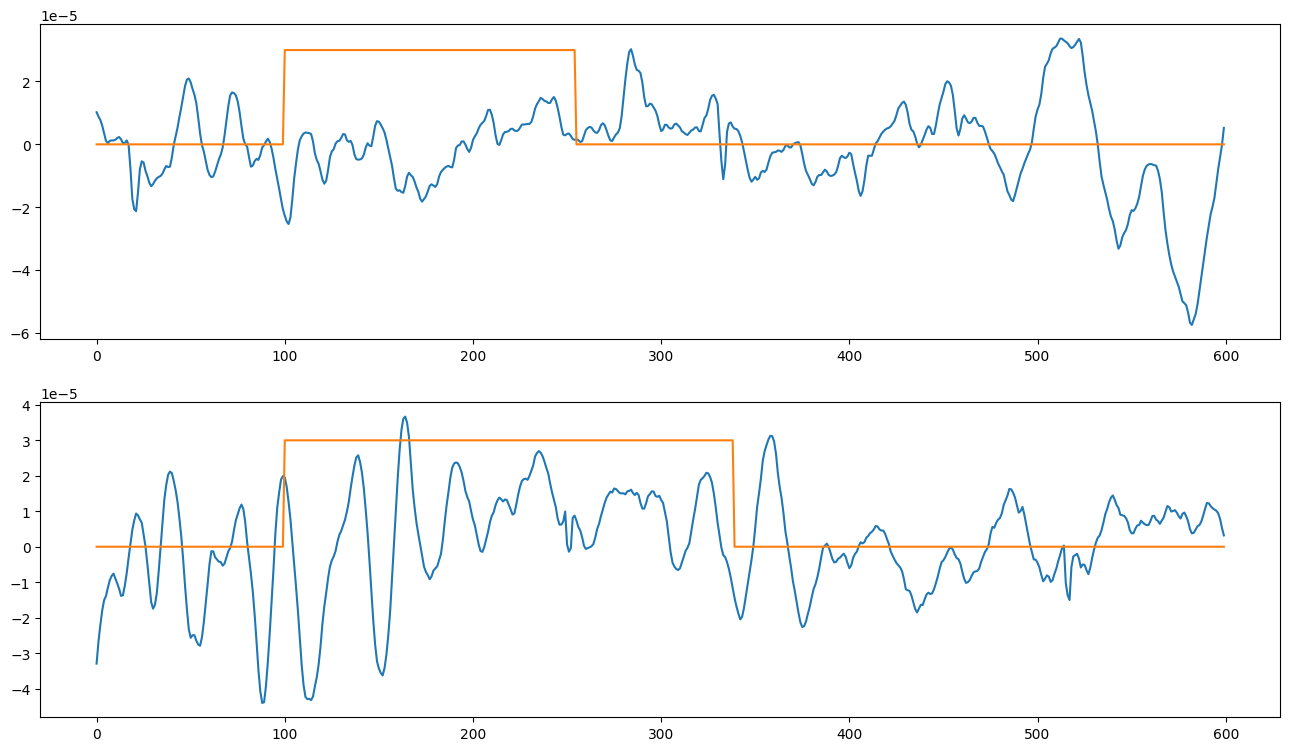

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


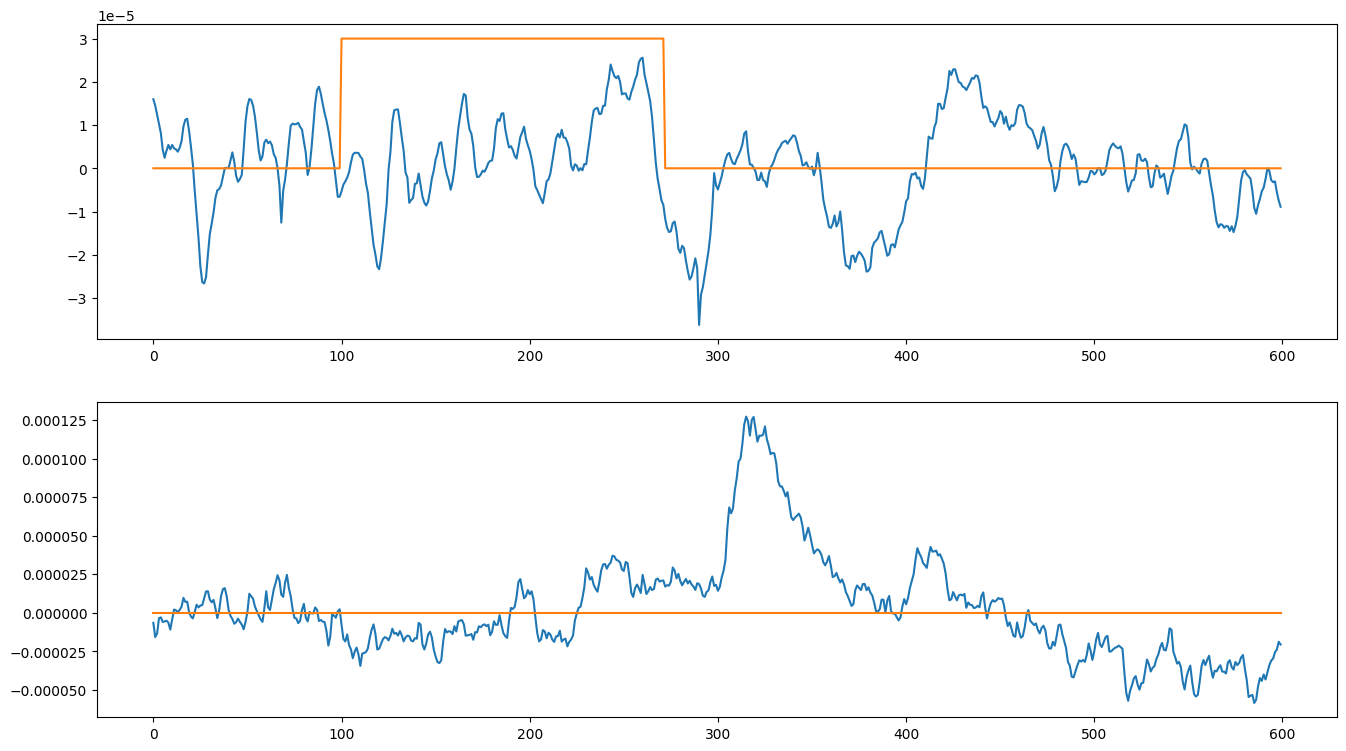

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


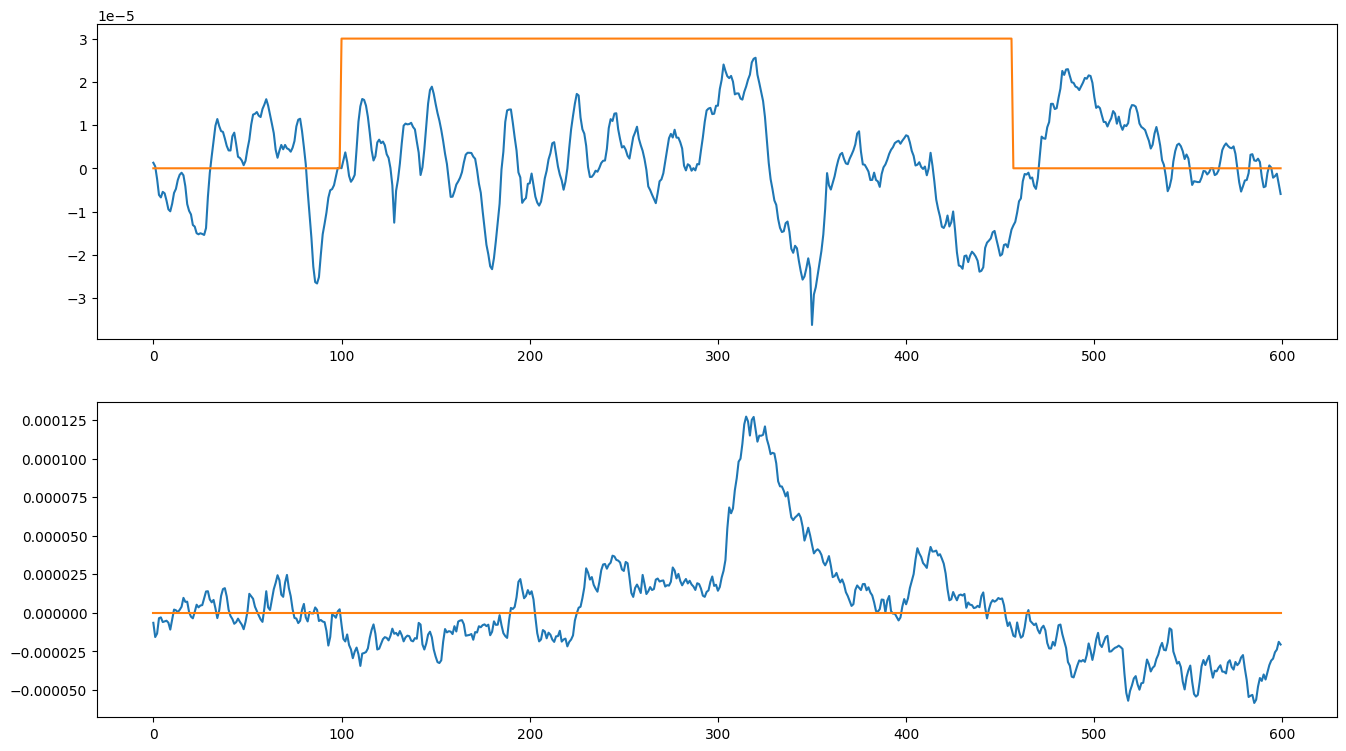

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


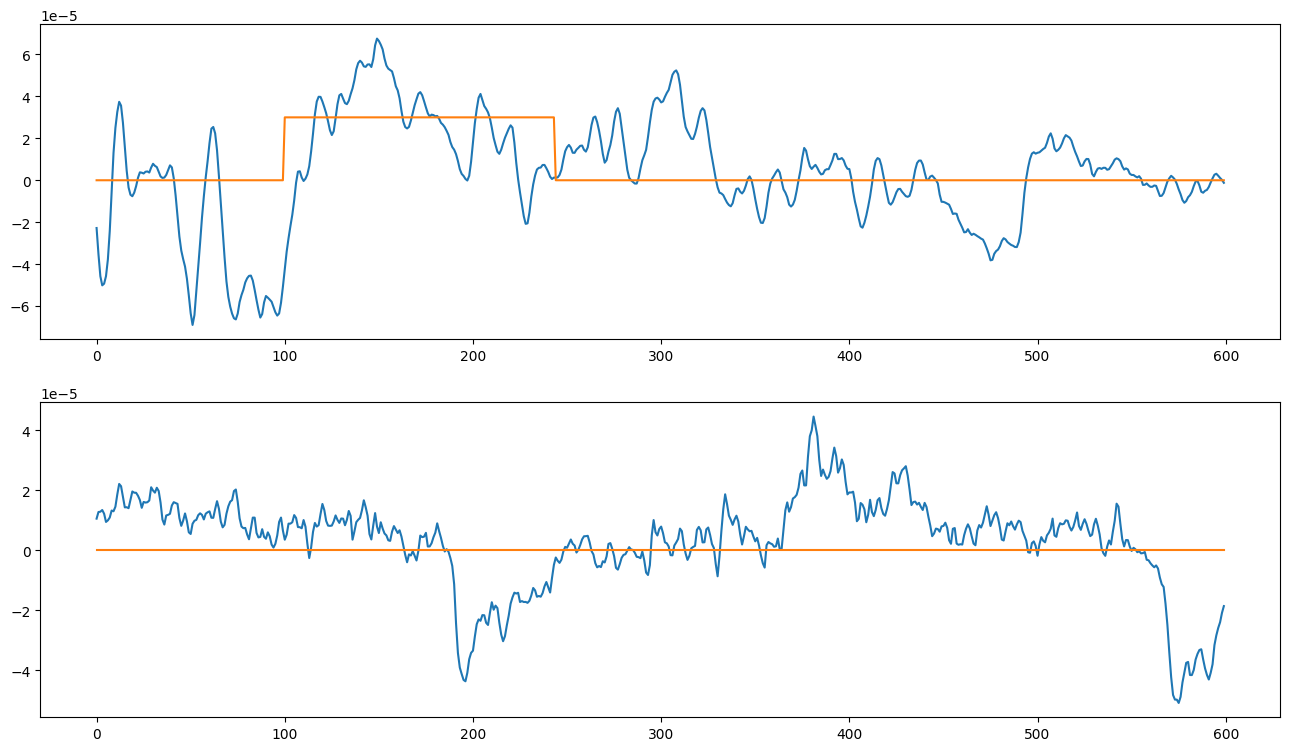

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


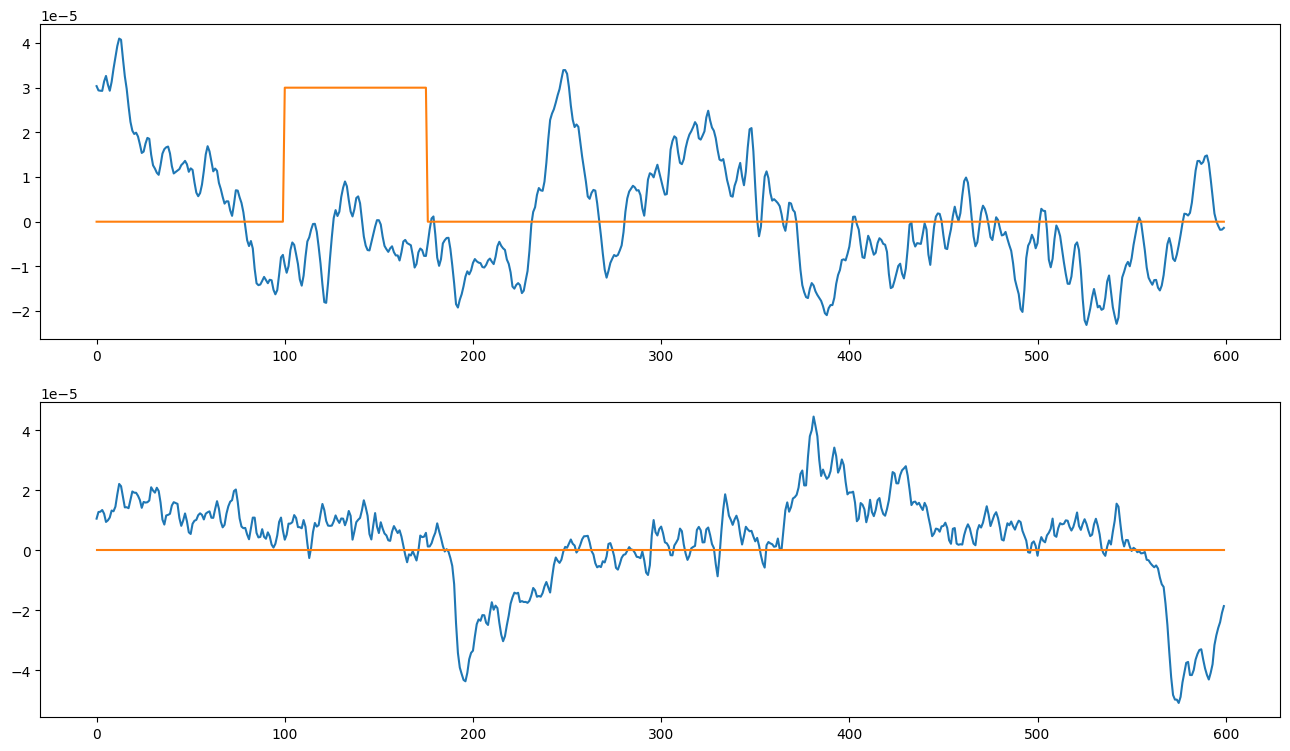

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


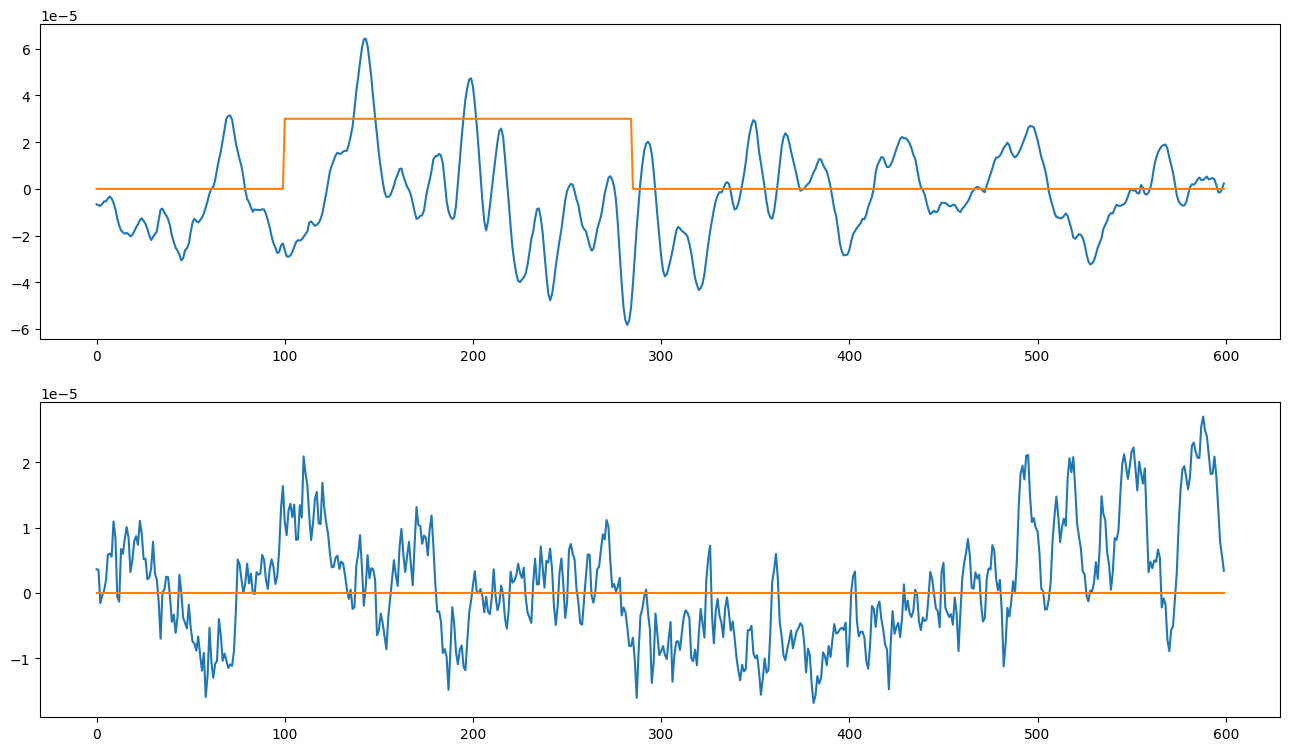

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


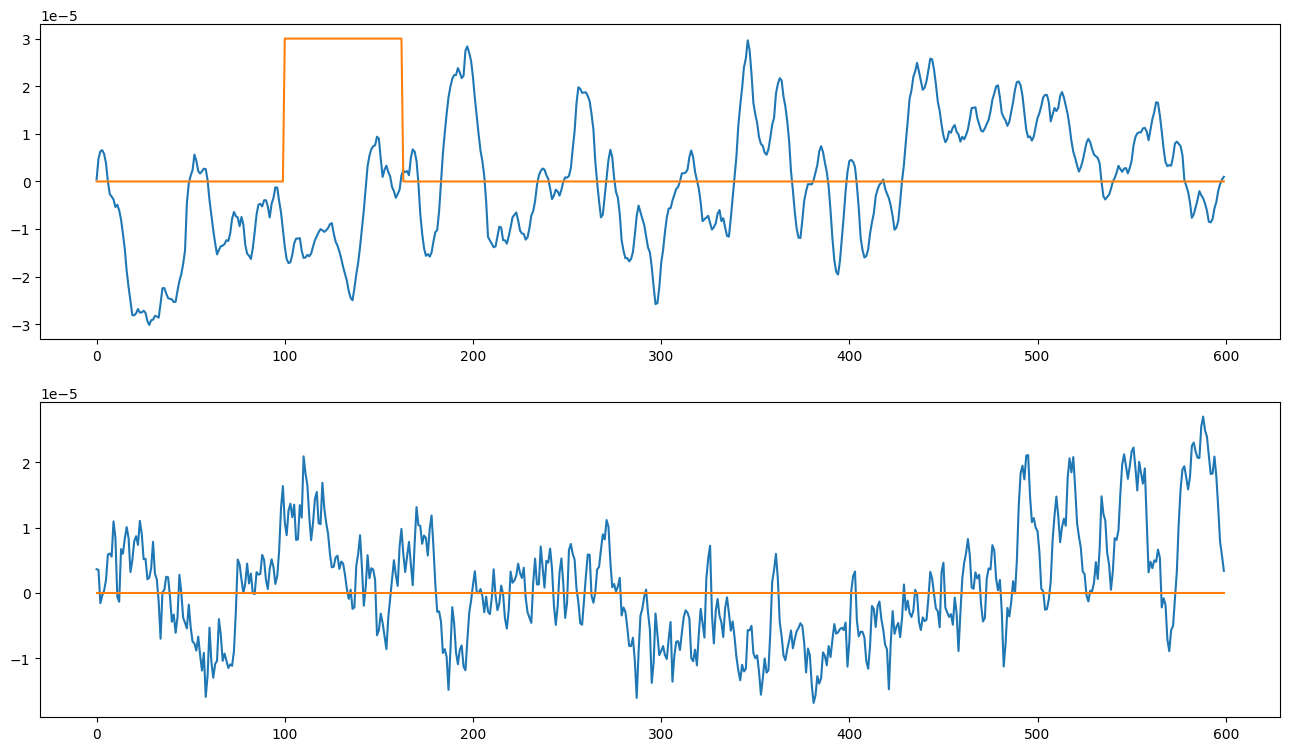

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


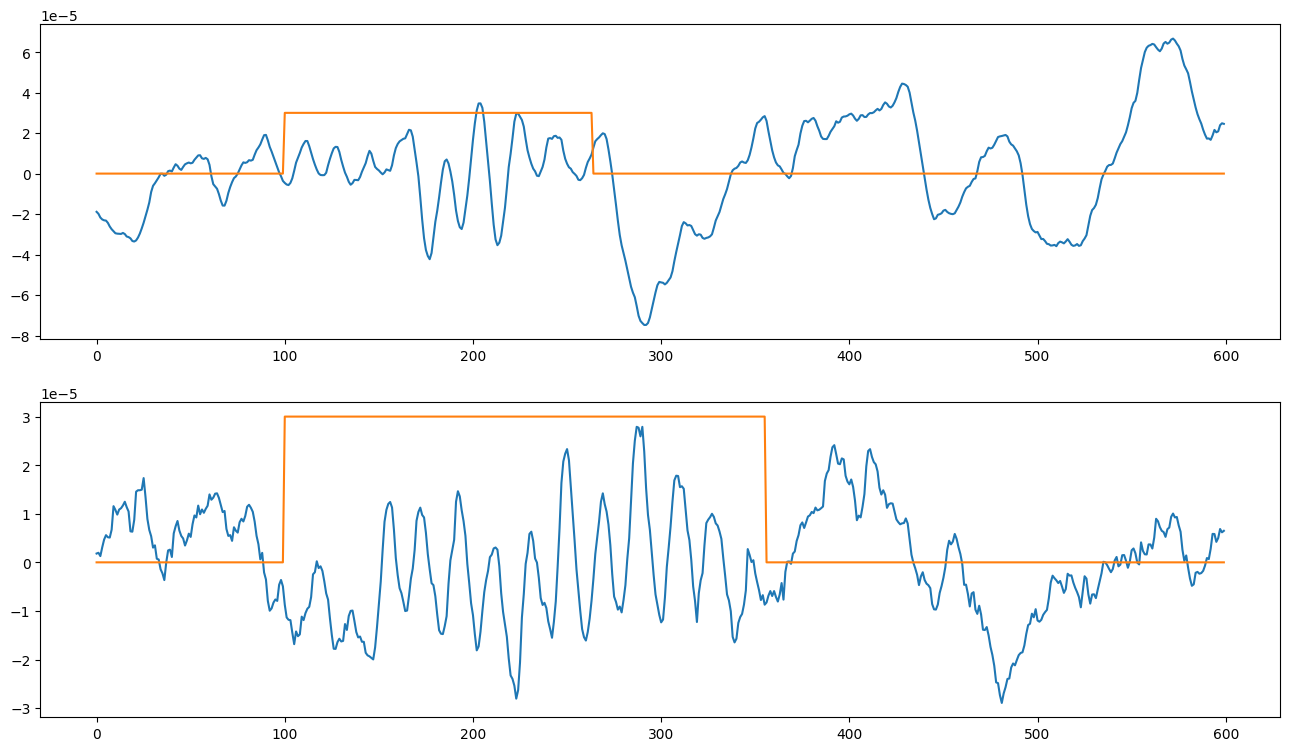

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


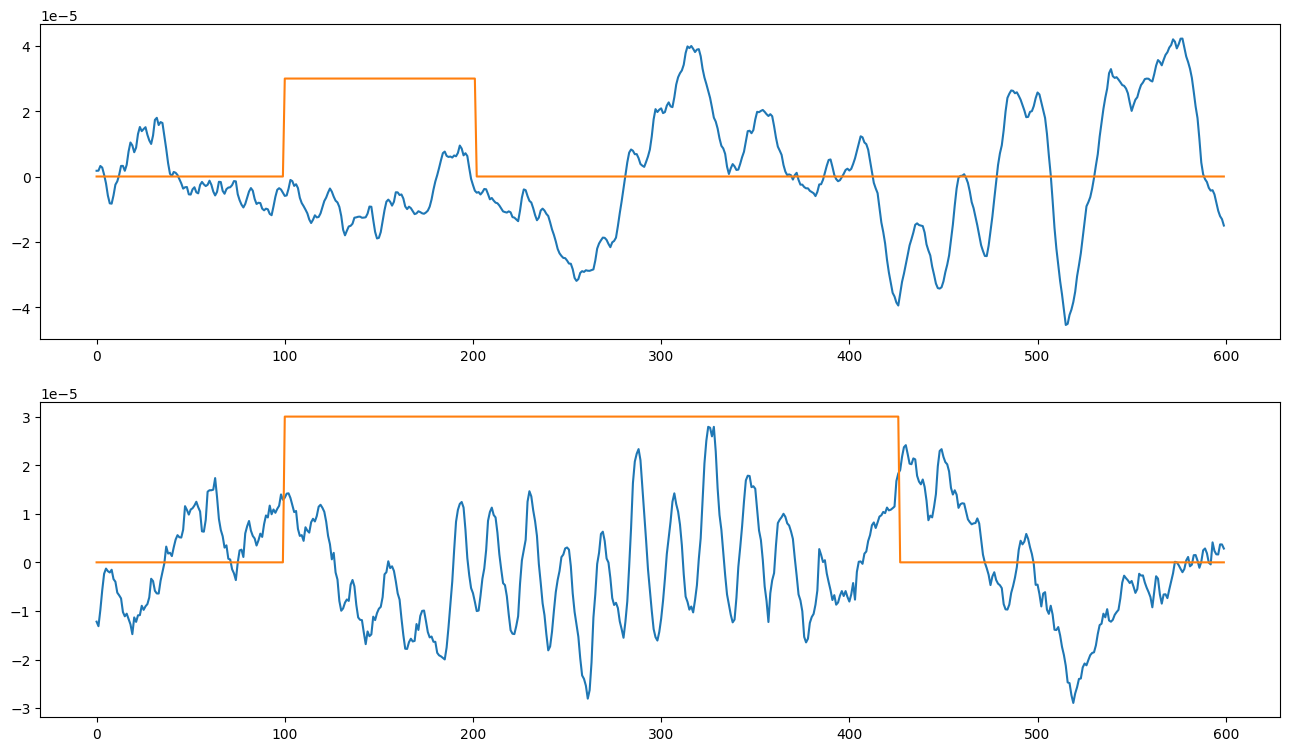

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


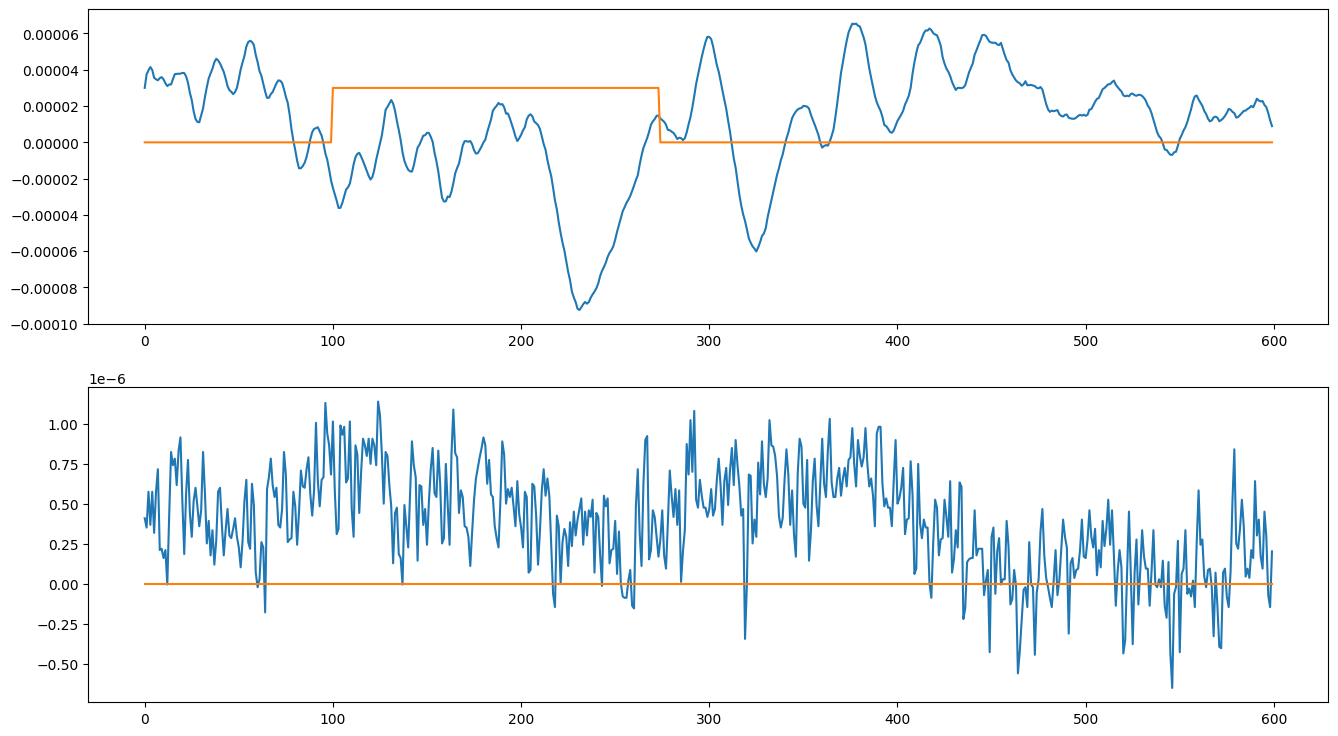

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


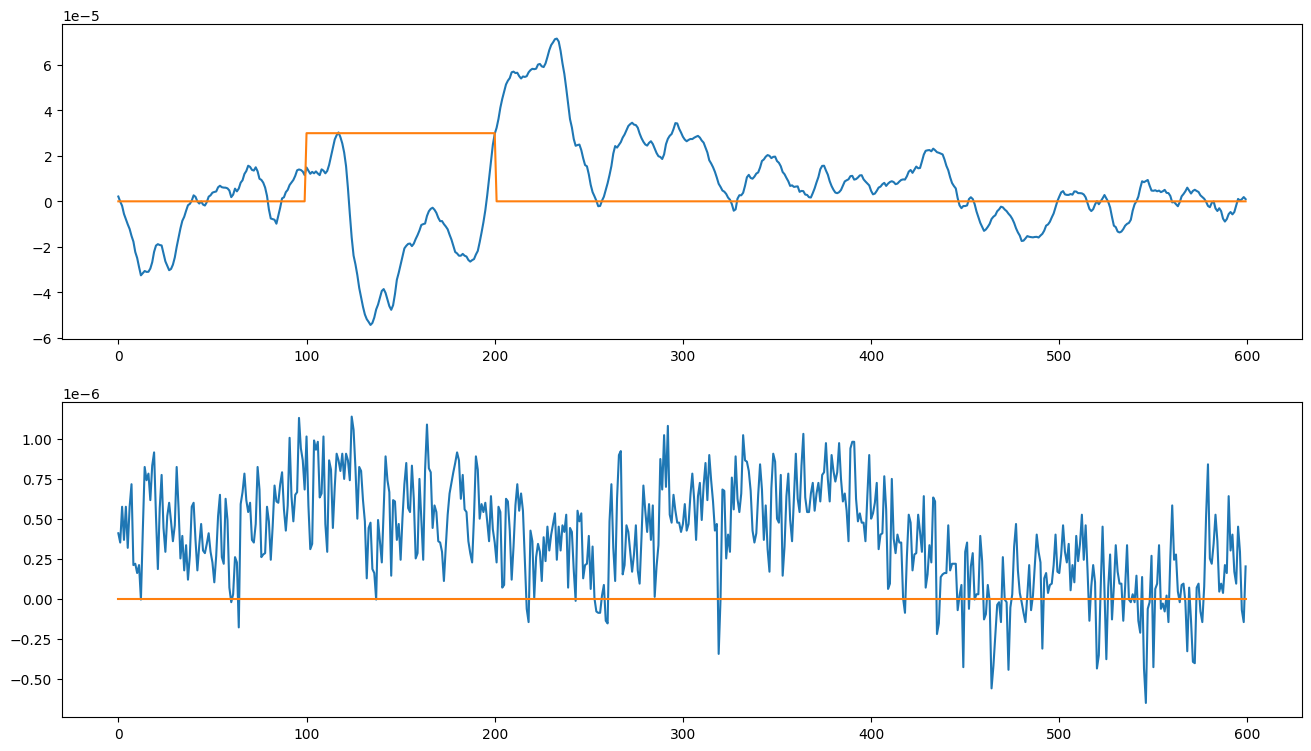

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


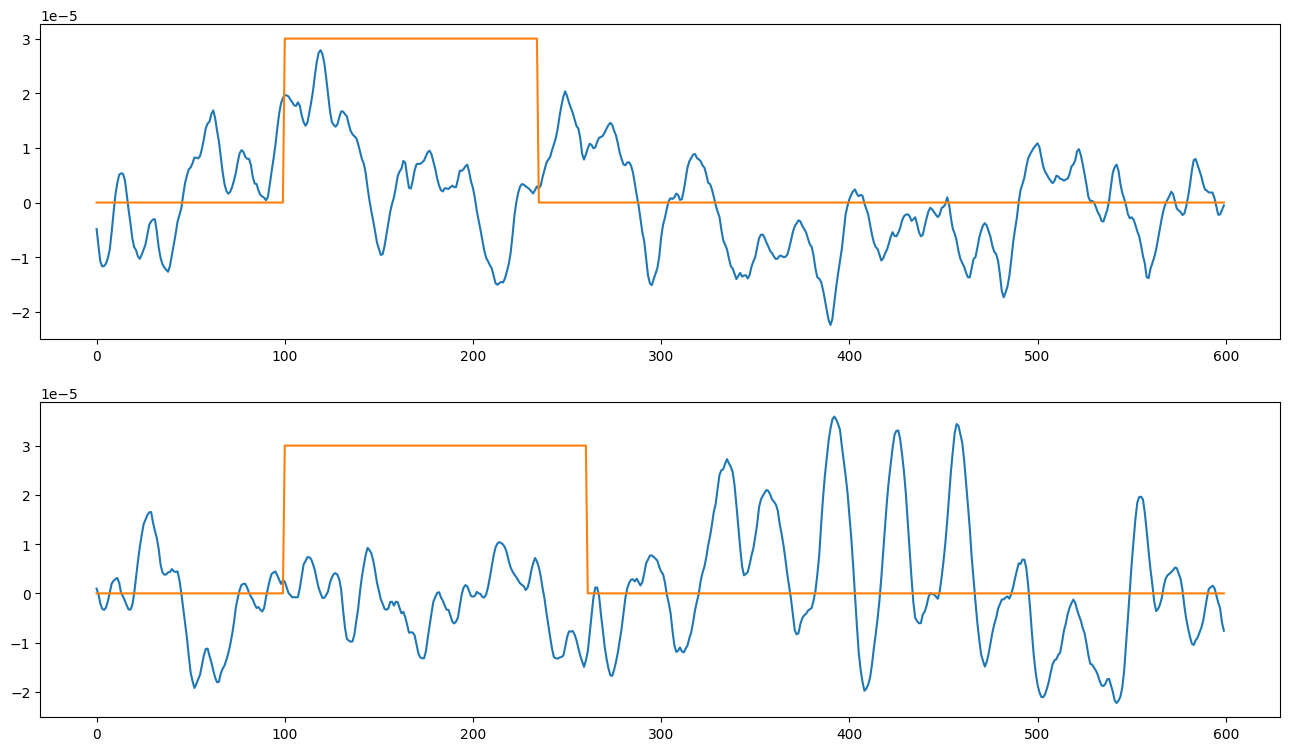

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


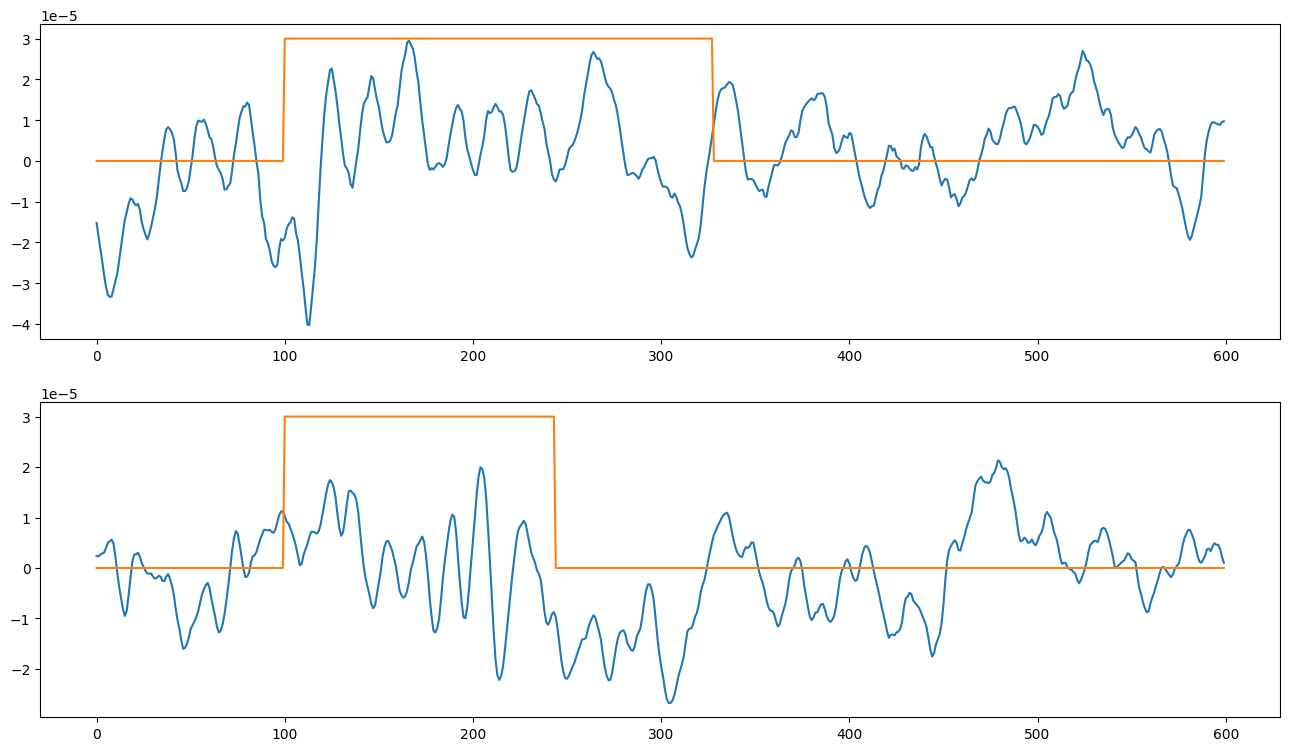

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


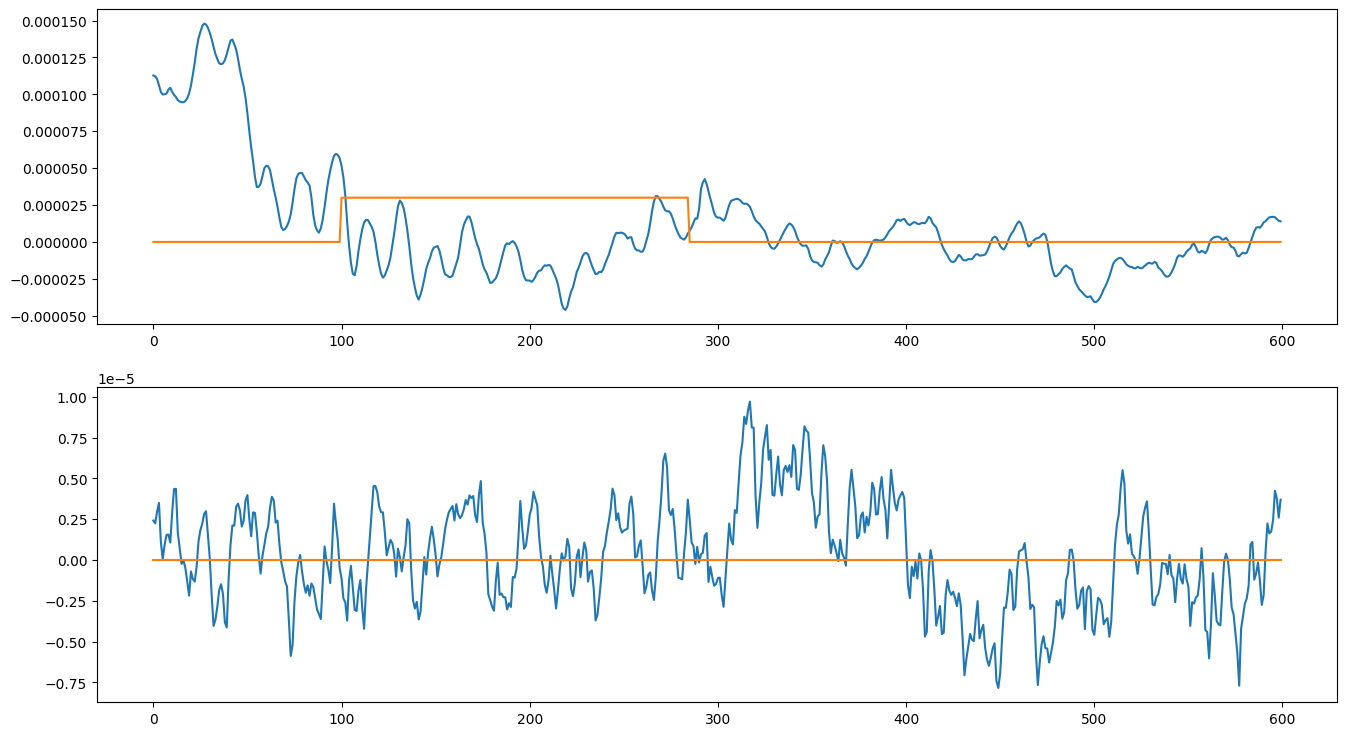

In [80]:
LabelingAllData()

In [86]:
def CreateAnnotation(labels, freq):  # можно связать с прошлой анотацией, попробовать p concatenate
    freq = 1/freq
    i = 0
    label_starts = []
    label_lens = []
    desc = []
    while i < len(labels):
        if labels[i] == 1:
            desc.append("SS")
            label_starts.append(i*freq)
            cur_start = i
            while labels[i] == 1:
                i += 1
            label_lens.append((i - cur_start) * freq)
        i += 1
    label_starts += []
    label_lens += []
    desc += []

    return np.array(label_starts), np.array(label_lens), np.array(desc)

In [87]:
def SavingDataAndLabels():
    data_filenames = []
    for file in os.listdir(PATH):
        if "PSG" in file:
            data_filenames.append(file)
    for file in tqdm(data_filenames):
        annot_filenameE1 = file[:10] + " Spindles_E1.edf"
        annot_filenameE2 = file[:10] + " Spindles_E2.edf"

        data = mne.io.read_raw_edf(PATH + file)

        labels1 = 1
        labels2 = 1
        
        if annot_filenameE1 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE1)
            labels1 = Labeling(data.times, annot_data.annotations)
            annot_data.close()
        
        if annot_filenameE2 in os.listdir(PATH):
            annot_data =  mne.io.read_raw_edf(PATH + annot_filenameE2)
            labels2 = Labeling(data.times, annot_data.annotations)
            annot_data.close()

        labels = labels1 * labels2
        freq = data.info["sfreq"]
        labs_annotations = CreateAnnotation(labels, freq)
        annotations = mne.Annotations(labs_annotations[0], labs_annotations[1], labs_annotations[2])
        data.set_annotations(annotations)
        data.export("data/" + file + "WithLabels.edf", overwrite=True)
        data.close()
            
        

In [88]:
SavingDataAndLabels()

  0%|                                                            | 0/17 [00:00<?, ?it/s]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0004 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7169023  =      0.000 ... 28003.996 secs...


  6%|███                                                 | 1/17 [00:14<03:57, 14.87s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0010 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6638079  =      0.000 ... 25929.996 secs...


 12%|██████                                              | 2/17 [00:52<07:05, 28.37s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0013 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9311231  =      0.000 ... 36371.996 secs...


 18%|█████████▏                                          | 3/17 [01:38<08:26, 36.16s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0009 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7637503  =      0.000 ... 29833.996 secs...


 24%|████████████▏                                       | 4/17 [02:22<08:30, 39.25s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0012 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8071679  =      0.000 ... 31529.996 secs...


 29%|███████████████▎                                    | 5/17 [02:59<07:42, 38.58s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0008 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6872575  =      0.000 ... 26845.996 secs...


 35%|██████████████████▎                                 | 6/17 [03:13<05:33, 30.33s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0002 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8964095  =      0.000 ... 35015.996 secs...


 41%|█████████████████████▍                              | 7/17 [04:17<06:53, 41.31s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0006 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7421439  =      0.000 ... 28989.996 secs...


 47%|████████████████████████▍                           | 8/17 [04:38<05:13, 34.87s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0017 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7255551  =      0.000 ... 28341.996 secs...


 53%|███████████████████████████▌                        | 9/17 [05:08<04:24, 33.11s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0015 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7453183  =      0.000 ... 29113.996 secs...


 59%|██████████████████████████████                     | 10/17 [05:21<03:08, 26.93s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0014 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7213055  =      0.000 ... 28175.996 secs...


 65%|█████████████████████████████████                  | 11/17 [05:58<03:00, 30.00s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0007 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7245311  =      0.000 ... 28301.996 secs...


 71%|████████████████████████████████████               | 12/17 [06:36<02:43, 32.62s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0011 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6511103  =      0.000 ... 25433.996 secs...


 76%|███████████████████████████████████████            | 13/17 [07:06<02:06, 31.74s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7412735  =      0.000 ... 28955.996 secs...


 82%|██████████████████████████████████████████         | 14/17 [07:56<01:52, 37.38s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0003 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9410559  =      0.000 ... 36759.996 secs...


 88%|█████████████████████████████████████████████      | 15/17 [08:22<01:07, 33.72s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0005 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7998463  =      0.000 ... 31243.996 secs...


 94%|████████████████████████████████████████████████   | 16/17 [08:51<00:32, 32.54s/it]

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0016 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7255039  =      0.000 ... 28339.996 secs...


100%|███████████████████████████████████████████████████| 17/17 [09:07<00:00, 32.19s/it]


### DRAFTS

In [2]:
data = mne.io.read_raw_edf("../../../MASS/ss2/01-02-0001 PSG.edf")
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-CLE, EEG Fp2-CLE, EEG F3-CLE, EEG F4-CLE, EEG F7-CLE, ...
 chs: 27 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2000-01-01 23:00:59 UTC
 nchan: 27
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>

In [4]:
channels

['EEG Fp1-CLE',
 'EEG Fp2-CLE',
 'EEG F3-CLE',
 'EEG F4-CLE',
 'EEG F7-CLE',
 'EEG F8-CLE',
 'EEG C3-CLE',
 'EEG C4-CLE',
 'EEG P3-CLE',
 'EEG P4-CLE',
 'EEG O1-CLE',
 'EEG O2-CLE',
 'EEG T3-CLE',
 'EEG T4-CLE',
 'EEG T5-CLE',
 'EEG T6-CLE',
 'EEG Fpz-CLE',
 'EEG Cz-CLE',
 'EEG Pz-CLE',
 'EOG Upper Vertic',
 'EOG Lower Vertic',
 'EOG Left Horiz',
 'EOG Right Horiz',
 'EMG Chin',
 'ECG ECGI',
 'Resp Nasal',
 'EEG A2-CLE']

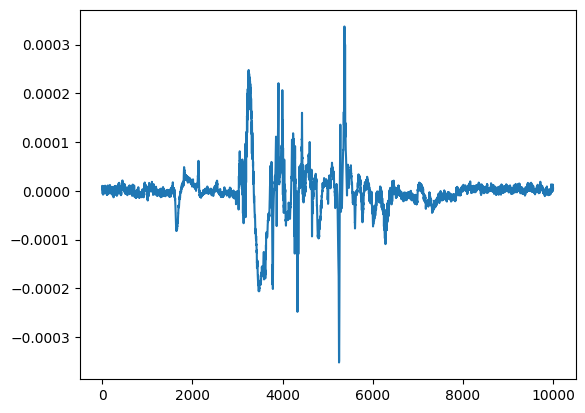

In [5]:
plt.plot(raw_data[0, :10000])

In [6]:
annot_data =  mne.io.read_raw_edf("../../../MASS/ss2/01-02-0001 Spindles_E1.edf")
# you can get the metadata included in the file and a list of all channels:
annot_info = annot_data.info
annot_channels = annot_data.ch_names

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [26]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-CLE, EEG Fp2-CLE, EEG F3-CLE, EEG F4-CLE, EEG F7-CLE, ...
 chs: 27 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2000-01-01 23:00:59 UTC
 nchan: 27
 projs: []
 sfreq: 256.0 Hz
 subject_info: 3 items (dict)
>

In [27]:
annot_info

<Info | 6 non-empty values
 bads: []
 ch_names: []
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2000-01-01 23:00:59 UTC
 nchan: 0
 projs: []
 sfreq: 60.0 Hz
 subject_info: 3 items (dict)
>

In [7]:
annot_info["sfreq"]

60.00384024577573

In [8]:
info["sfreq"]


256.0

In [32]:
#new_annot_time = np.linspace(annot_data.times[0], annot_data.times[-1], int(info["sfreq"] / annot_info["sfreq"] * len(annot_data.times)))

In [33]:
new_annot_time

array([0.00000000e+00, 3.90624857e-03, 7.81249714e-03, ...,
       2.89561222e+04, 2.89561261e+04, 2.89561300e+04])

In [16]:
annot_data.times

array([0.00000000e+00, 1.66656000e-02, 3.33312000e-02, ...,
       2.89560967e+04, 2.89561134e+04, 2.89561300e+04])

In [32]:
data.times

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       2.89559883e+04, 2.89559922e+04, 2.89559961e+04])

In [15]:
annot_data.annotations[0]

OrderedDict([('onset', 888.569501),
             ('duration', 0.640579),
             ('description',
              '<Event channel="EEG C3-LER" groupName="spindle" name="spindleE1" scoringType="manual"/>'),
             ('orig_time',
              datetime.datetime(2000, 1, 1, 23, 0, 59, tzinfo=datetime.timezone.utc))])

In [38]:
14 * 60

840

In [46]:
labels = Labeling(data.times, annot_data.annotations)

In [11]:
data.times.shape

(7412736,)

In [12]:
labels.shape

(7412736,)

In [13]:
start = np.array(data.times < 888.569501).argmin()
fin = np.array(data.times < 888.569501 + 0.640579).argmin()

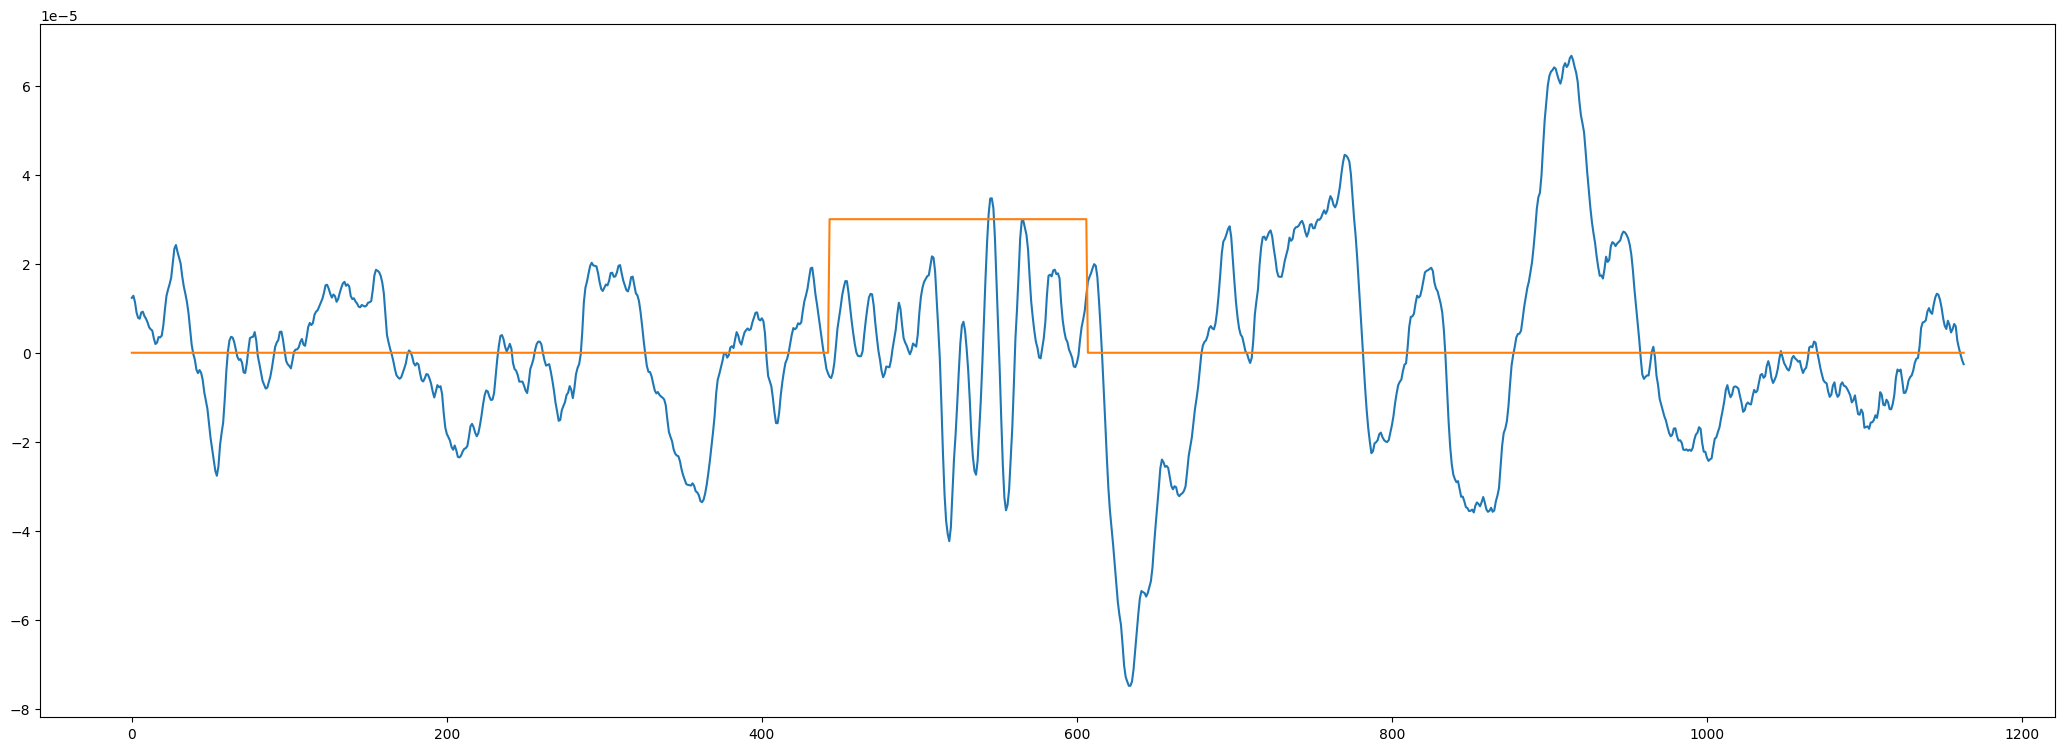

In [43]:
plt.figure(figsize=(26, 9))
plt.plot(raw_data[3, start - 500: fin + 500])
check = np.zeros(fin - start + 1000)
check[500 - 57:-500 - 57] = 1
plt.plot(check  * 3e-5)

#plt.plot(labels[start - 500: fin + 500] * 3e-5)


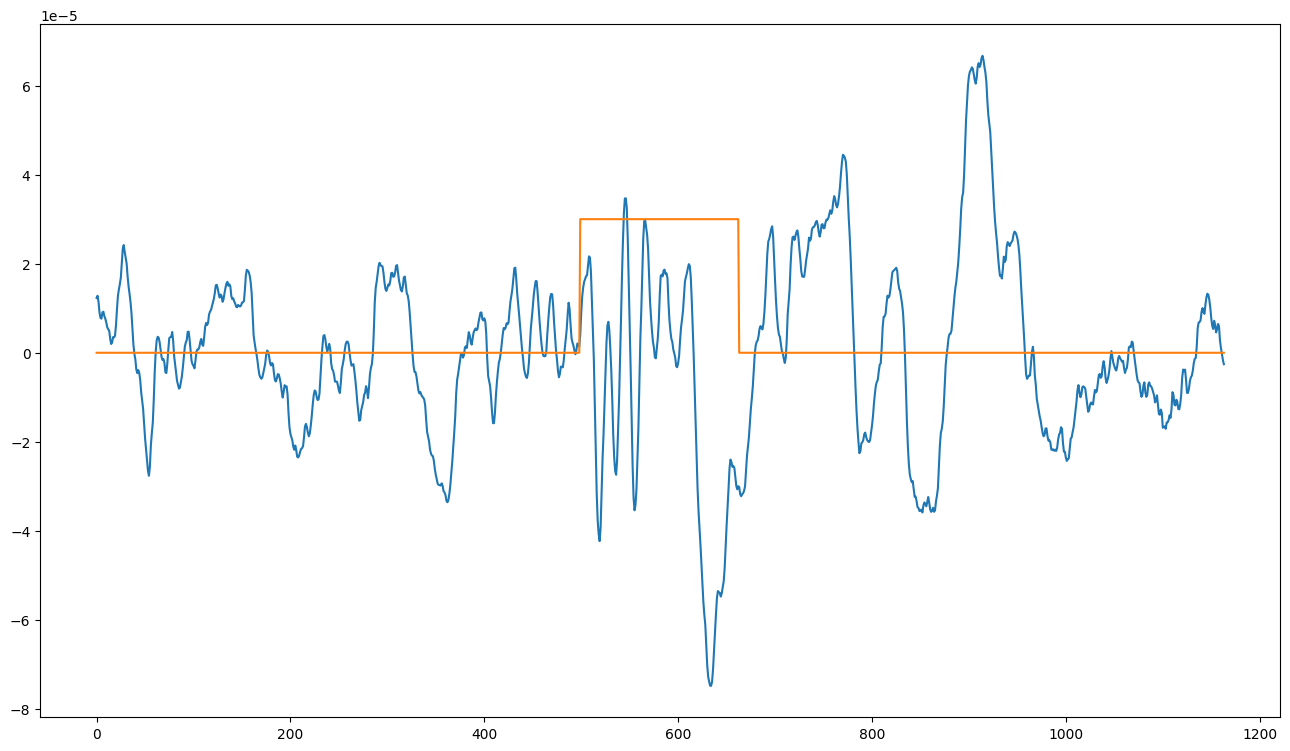

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, start - 500: fin + 500])
plt.plot(labels[start - 500: fin + 500] * 3e-5)


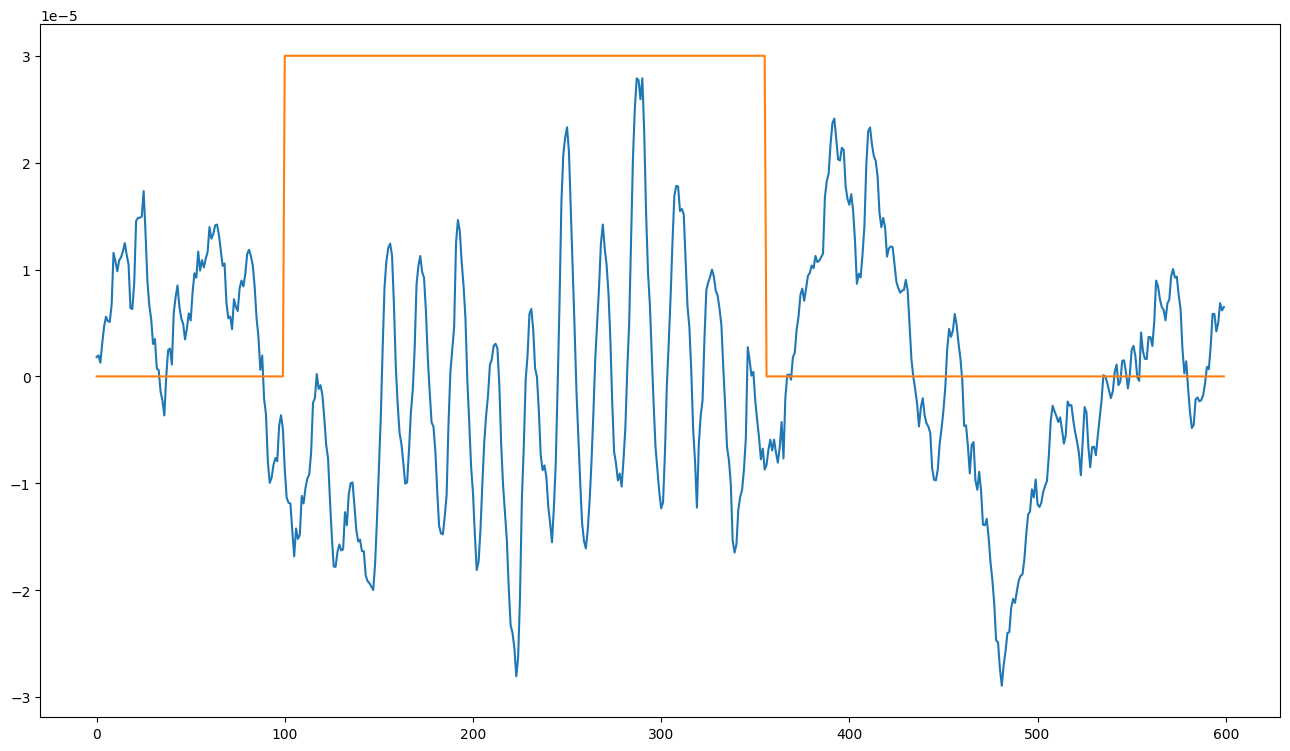

In [48]:
ind = labels[-100000:].argmax() + 7412736-100000
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, ind - 100: ind + 500])
plt.plot(labels[ind - 100: ind + 500] * 3e-5)


In [49]:
annot_data =  mne.io.read_raw_edf("../../../MASS/ss2/01-02-0001 Spindles_E2.edf")
# you can get the metadata included in the file and a list of all channels:
annot_info = annot_data.info
annot_channels = annot_data.ch_names

Extracting EDF parameters from /home/gromov_n/MASS/ss2/01-02-0001 Spindles_E2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [53]:
annot_info["sfreq"]

49.503168202764975

In [50]:
labels = Labeling(data.times, annot_data.annotations)

In [51]:
start = np.array(data.times < 888.569501).argmin()
fin = np.array(data.times < 888.569501 + 0.640579).argmin()

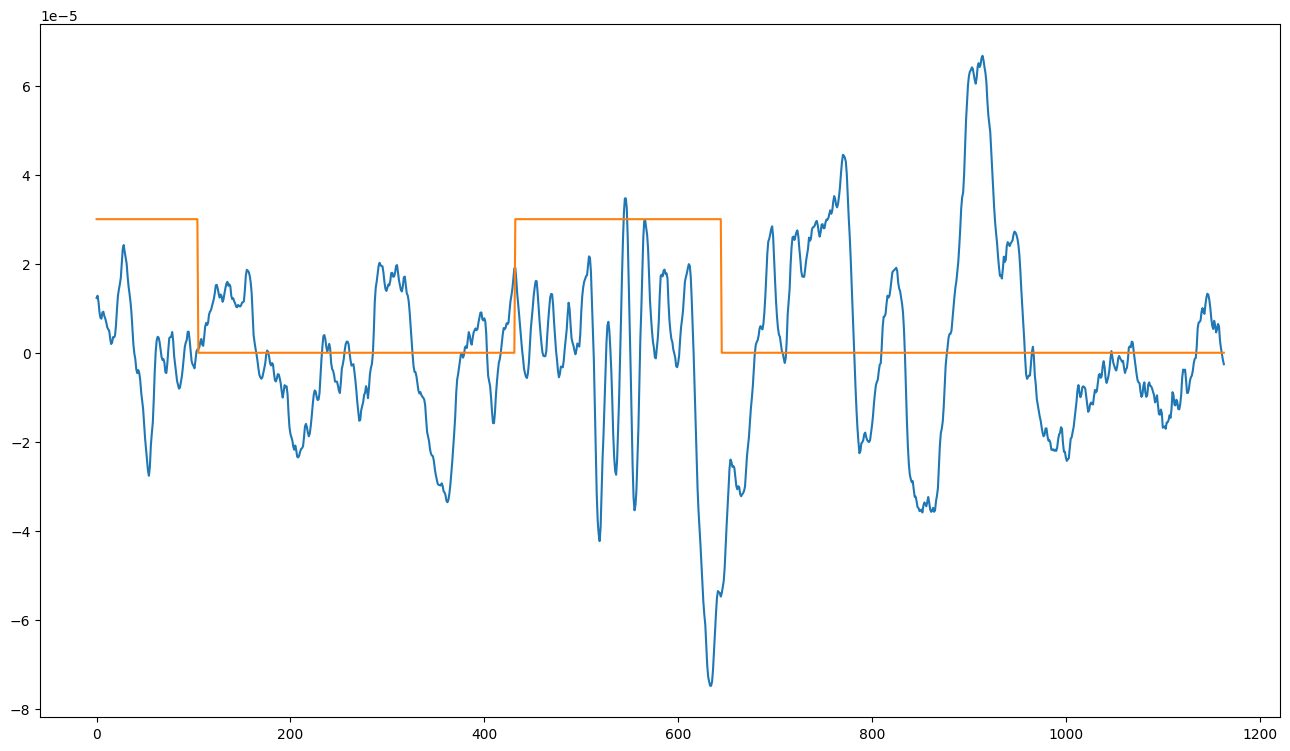

In [52]:
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, start - 500: fin + 500])
plt.plot(labels[start - 500: fin + 500] * 3e-5)


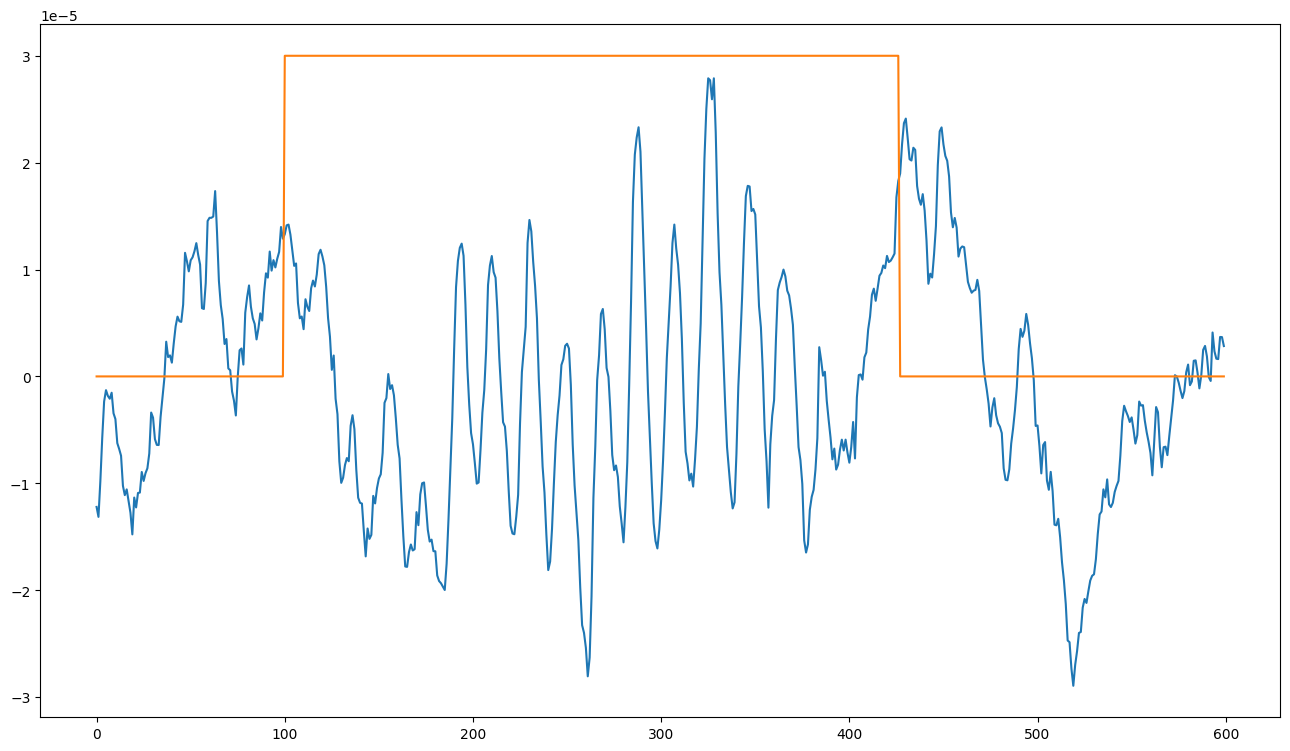

In [54]:
ind = labels[-100000:].argmax() + 7412736-100000
plt.figure(figsize=(16, 9))
plt.plot(raw_data[3, ind - 100: ind + 500])
plt.plot(labels[ind - 100: ind + 500] * 3e-5)
